<h1>MODEL EVALUATOR</h1>

In [7]:
#LOAD DEPENDENCIES
import os
import cv2
import time
import pickle
import logging
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

#Evaluation libraries
import itertools
import scikitplot 
import matplotlib.patheffects as path_effects
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import classification_report,confusion_matrix, roc_curve, auc, accuracy_score


#Model loader libraries
from pickle import load
from tensorflow.keras import applications
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras import Model, layers
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#PREVENT ERROR UNCESSARY MESSAGES
tf.get_logger().setLevel(logging.ERROR)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [8]:
#LOAD THE DATA
train_data_dir = "data/train/"
validation_data_dir = "data/validation/"
test_data_dir = "data/test/"

img_rows, img_cols = 224, 224
input_shape = (img_rows,img_cols,3)
model_input = Input(shape=input_shape)

print("Data folders found!")
print("The Input size is set to ", model_input) 

Data folders found!
The Input size is set to  KerasTensor(type_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_2'), name='input_2', description="created by layer 'input_2'")


In [9]:
#Assign the constants
batch_size = 8
epochs = 25

In [10]:
#DATA GENERATORS
val_datagen = ImageDataGenerator(rescale = 1. / 255)

test_datagen = ImageDataGenerator(rescale = 1. / 255)

validation_generator = val_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_rows,img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        seed=42,
        shuffle=False,
        classes=['0_normal', 
                 '1_ulcerative_colitis', 
                 '2_polyps', 
                 '3_esophagitis'])

test_generator = test_datagen.flow_from_directory(
        test_data_dir,
        target_size=(img_rows,img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        seed=42,
        shuffle=False,
        classes=['0_normal', 
                 '1_ulcerative_colitis', 
                 '2_polyps', 
                 '3_esophagitis'])

#CHECK  THE NUMBER OF SAMPLES
nb_validation_samples = len(validation_generator.filenames)
nb_test_samples = len(test_generator.filenames)

print("Validation samples:", nb_validation_samples)
print("Test samples:", nb_test_samples)

if nb_validation_samples == 0:
    print("NO DATA VALIDATION FOUND! Please check your validation data path and folders!")
    print("Check the data folders first!")
else:
    print("Validation samples found!")
    
if nb_test_samples == 0:
    print("NO DATA TEST FOUND! Please check your test data path and folders!")
    print("Check the data folders first!")
else:
    print("Test samples found!")

#check the class indices
validation_generator.class_indices
test_generator.class_indices

#true labels
Y_test=validation_generator.classes
test_labels = test_generator.classes

num_classes= len(validation_generator.class_indices)

print('Model set to train', num_classes, 'classes')

if nb_validation_samples and nb_test_samples > 0:
    print("Generators are set!")
    print("Check if dataset is complete and has no problems before proceeding.")

Found 2000 images belonging to 4 classes.
Found 800 images belonging to 4 classes.
Validation samples: 2000
Test samples: 800
Validation samples found!
Test samples found!
Model set to train 4 classes
Generators are set!
Check if dataset is complete and has no problems before proceeding.


In [31]:
#Load the model to evaluate

structure = ['MFuRe', 'MFNR']
dropout = ['alpha', 'standard', 'no']
LR = ['0.01','0.001','0.0001','0.00001','0.000001']

#Select the model to evaluate by changing the values for architecture from 0-1 and condition from 0-2
architecture = structure[0]
condition = dropout[0] 
LearningRate = LR[1]
DateTime = '_20240809-124042_'

#================================================================

model = load_model('models/' + architecture + 'CNN' + '_'+ condition + '_do_Learning_rate_'+ LearningRate + '/' +architecture + 'CNN_' + condition + '_do_Learning_rate_'+ LearningRate + DateTime+'model.h5')
# model = load_model('models/' + architecture + '_'+ condition + '_do/' + 'model.h5')
print("**The model is successfully loaded**")
print("====================================")
print()
print("**Review as needed**")
print("------------------------------------")
model._name = architecture + 'CNN' + '_'+ condition + '_do_Learning_rate_'+LearningRate
model.summary()
#================================================================


**The model is successfully loaded**

**Review as needed**
------------------------------------
Model: "MFuReCNN_alpha_do_Learning_rate_0.001"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1_DCNN_A_DCNN_B_DCNN  [(None, 224, 224, 3)]        0         []                            
 _C_DCNN_A_DCNN_B_DCNN_C (I                                                                       
 nputLayer)                                                                                       
                                                                                                  
 rescaling_2_DCNN_A (Rescal  (None, 224, 224, 3)          0         ['input_1_DCNN_A_DCNN_B_DCNN_C
 ing)                                                               _DCNN_A_DCNN_B_DCNN_C[0][0]'] 
                                                                 

**INITIAL CHECKING**

In [32]:
#Sanity evaluation for validation dataset
model.evaluate(validation_generator, return_dict = True)

250/250 [==============================] - 210s 831ms/step - loss: 0.2529 - accuracy: 0.9725


{'loss': 0.2529437839984894, 'accuracy': 0.9725000262260437}

In [13]:
#Sanity evaluation for test dataset
model.evaluate(test_generator, return_dict = True)

100/100 [==============================] - 90s 898ms/step - loss: 0.2194 - accuracy: 0.9737


{'loss': 0.21937328577041626, 'accuracy': 0.9737499952316284}

**VISUALIZATIONS**

In [14]:
#Modify only as needed

#Figure
dpi = 1000
plt.rcParams.update({'figure.dpi': dpi})
figsize = (12, 12)

#Markers
marker_train_accuracy = 's'
marker_validation_accuracy = 'x'
marker_train_loss = 'o'
marker_validation_loss = '|'
marker_fillstyle_train = 'none'
marker_fillstyle_validation = 'none'
marker_plot_markersize = 25
marker_plot_markerwidth = 3

#Lines
line_style_train = '-' 
line_style_validation = '--'
line_width_train = '5'
line_width_val = line_width_train
line_color_train_accuracy = 'black'
line_color_val_accuracy = 'black'
line_color_train_loss = 'black'
line_color_val_loss = 'black'

#Labels
train_accuracy_label = 'Train ' + 'Acc'
validation_accuracy_label = 'Val ' + 'Acc'
train_loss_label = 'Train ' + 'Loss'
validation_loss_label = 'Val ' 'Loss'
x_label_font_size = 56
y_label_font_size = x_label_font_size
x_label_font = 'Tahoma'
y_label_font = x_label_font
# x_label_fontweight = 'bold'
# y_label_fontweight = x_label_fontweight

#Ticks
spine_axis_thickness = 4
tick_font_size = 42
tick_length = 12
tick_width = spine_axis_thickness

#Legend
legend_border_pad = 0.35
legend_line_width = 5
legend_font_size = 50
legend_edge_color = 'black'
legend_label_spacing = 0.5
legend_location = 'best'
legend_ncol = 1
legend_font = 'Tahoma'
legend_has_frame = True

#saver
image_format = '.tiff'
figure_path = "figures/"

#Be careful when changing
acc_loss_save = figure_path + architecture + 'CNN' + '_'+ condition + '_do' + "/00-val_accuracy_loss" + image_format
val_cm_save = figure_path + architecture + 'CNN' + '_'+ condition + '_do' "/01-val_cm" + image_format
val_norm_cm_save = figure_path + architecture + 'CNN' + '_'+ condition + '_do' "/02-norm_val_cm" + image_format
test_cm_save = figure_path + architecture + 'CNN' + '_'+ condition + '_do' "/03-test_cm" + image_format
test_norm_cm_save = figure_path + architecture + 'CNN' + '_'+ condition + '_do' "/04-norm_test_cm" + image_format
val_roc_save = figure_path + architecture + 'CNN' + '_'+ condition + '_do' "/05-val_roc" + image_format
val_pr_save = figure_path + architecture + 'CNN' + '_'+ condition + '_do' "/06-val_pr" + image_format
test_roc_save = figure_path + architecture + 'CNN' + '_'+ condition + '_do' "/07-test_roc" + image_format
test_pr_save = figure_path + architecture + 'CNN' + '_'+ condition + '_do' "/08-pr_roc" + image_format

In [34]:
#Load history
history = load(open('models/' + architecture + 'CNN' + '_'+ condition + '_do_Learning_rate_'+ LearningRate + '/' + architecture + 'CNN_' + condition + '_do_Learning_rate_'+ LearningRate + DateTime +'history.pickle', 'rb'))

# history = load(open('models/' + architecture + '_'+ condition + '_do/' + 'model.history', 'rb'))
print("The History is Loaded") 

The History is Loaded


<Figure size 7200x7200 with 0 Axes>

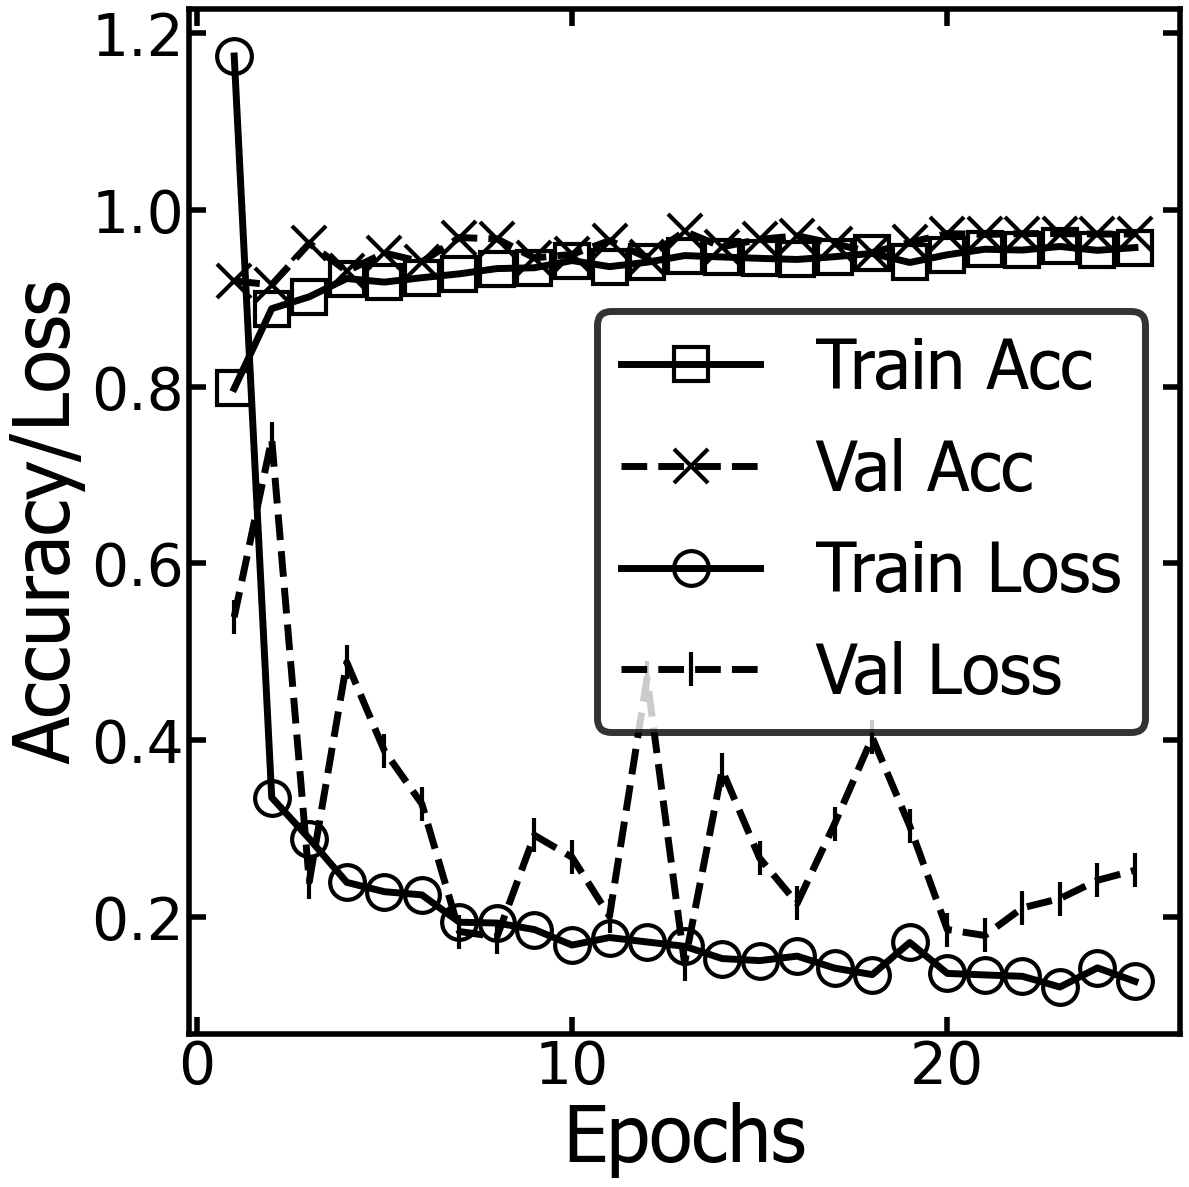

In [35]:
#Convergence

plt.style.use("default")
plt.figure(figsize = figsize, 
           dpi = 600, 
           edgecolor = 'black', 
           facecolor = 'white', 
           linewidth = 0)

plt.tight_layout()
plt.rc('xtick', labelsize = tick_font_size, direction="in") 
plt.rc('ytick', labelsize = tick_font_size, direction="in") 

fig, ax = plt.subplots(figsize = figsize)
plt.gcf().subplots_adjust(bottom = 0.15)
plt.setp(ax.spines.values(), linewidth = spine_axis_thickness)

plt.tick_params(length = tick_length, 
                width = tick_width, 
                right = True, 
                top = True)

plt.plot(np.arange(1, epochs + 1), 
         history["accuracy"], 
         mew = marker_plot_markerwidth, 
         color = line_color_train_accuracy, 
         lw = line_width_train, 
         marker = marker_train_accuracy, 
         markersize = marker_plot_markersize, 
         fillstyle = marker_fillstyle_train, 
         ls = line_style_train, 
         label = train_accuracy_label)

plt.plot(np.arange(1, epochs + 1), 
         history["val_accuracy"], 
         mew = marker_plot_markerwidth, 
         color = line_color_val_accuracy, 
         lw = line_width_val, 
         marker = marker_validation_accuracy, 
         markersize = marker_plot_markersize, 
         fillstyle = marker_fillstyle_validation, 
         ls = line_style_validation,  
         label = validation_accuracy_label)

plt.plot(np.arange(1, epochs + 1), 
         history["loss"], 
         mew = marker_plot_markerwidth, 
         color = line_color_train_loss, 
         lw = line_width_train, 
         marker = marker_train_loss, 
         markersize = marker_plot_markersize, 
         fillstyle = marker_fillstyle_train, 
         ls = line_style_train, label = train_loss_label)

plt.plot(np.arange(1, epochs + 1), 
         history["val_loss"], 
         mew = marker_plot_markerwidth, 
         color = line_color_val_loss, 
         lw = line_width_val, 
         marker = marker_validation_loss, 
         markersize = marker_plot_markersize, 
         fillstyle = marker_fillstyle_validation, 
         ls = line_style_validation,  
         label = validation_loss_label)

plt.xlabel("Epochs", fontfamily = x_label_font, fontsize = x_label_font_size, color ='black')
plt.ylabel("Accuracy/Loss", fontfamily = y_label_font, fontsize = y_label_font_size, color = 'black')

legend = plt.legend(loc = legend_location, 
                    ncol = legend_ncol, 
                    frameon = legend_has_frame, 
                    fontsize=legend_font_size, 
                    edgecolor=legend_edge_color, 
                    borderpad=legend_border_pad, 
                    labelspacing=legend_label_spacing)

frame = legend.get_frame()
legend.get_frame().set_linewidth(legend_line_width)
legend.get_frame().set_edgecolor(legend_edge_color)
plt.setp(legend.texts, family = legend_font)
plt.tight_layout()

plt.savefig(acc_loss_save, 
            bbox_inches='tight', 
            dpi=dpi)

In [17]:
# Validation Results

#evaluate accuracy
y_pred = model.predict(validation_generator,
                                 nb_validation_samples/batch_size, workers=1)

accuracy = accuracy_score(Y_test, y_pred.argmax(axis=-1))
print('The accuracy of the model is: ', accuracy)

#evaluate mean squared error
mse = mean_squared_error(Y_test, y_pred.argmax(axis=-1))
print('The Mean Squared Error of the model is: ', mse)

#evaluate mean squared log error
msle = mean_squared_log_error(Y_test, y_pred.argmax(axis=-1))  
print('The Mean Squared Log Error of the model is: ', msle)

250/250 [==============================] - 221s 875ms/step
The accuracy of the model is:  0.9725
The Mean Squared Error of the model is:  0.039
The Mean Squared Log Error of the model is:  0.007830091494323092


In [18]:
# Test Results

#evaluate accuracy
test_pred = model.predict(test_generator,
                                 nb_test_samples/batch_size, workers=1)

test_accuracy = accuracy_score(test_labels, test_pred.argmax(axis=-1))
print('The accuracy of the model is: ', test_accuracy)

#evaluate mean squared error
test_mse = mean_squared_error(test_labels, test_pred.argmax(axis=-1))
print('The Mean Squared Error of the model is: ', test_mse)

#evaluate mean squared log error
test_msle = mean_squared_log_error(test_labels, test_pred.argmax(axis=-1))  
print('The Mean Squared Log Error of the model is: ', test_msle)

100/100 [==============================] - 81s 807ms/step
The accuracy of the model is:  0.97375
The Mean Squared Error of the model is:  0.0375
The Mean Squared Log Error of the model is:  0.00760999523320296


              precision    recall  f1-score   support

      Normal     0.9940    0.9900    0.9920       500
       Ulcer     0.9312    0.9740    0.9521       500
      Polyps     0.9768    0.9260    0.9507       500
 Esophagitis     0.9901    1.0000    0.9950       500

    accuracy                         0.9725      2000
   macro avg     0.9730    0.9725    0.9725      2000
weighted avg     0.9730    0.9725    0.9725      2000

Normalized confusion matrix
[[0.99  0.008 0.    0.002]
 [0.    0.974 0.022 0.004]
 [0.006 0.064 0.926 0.004]
 [0.    0.    0.    1.   ]]


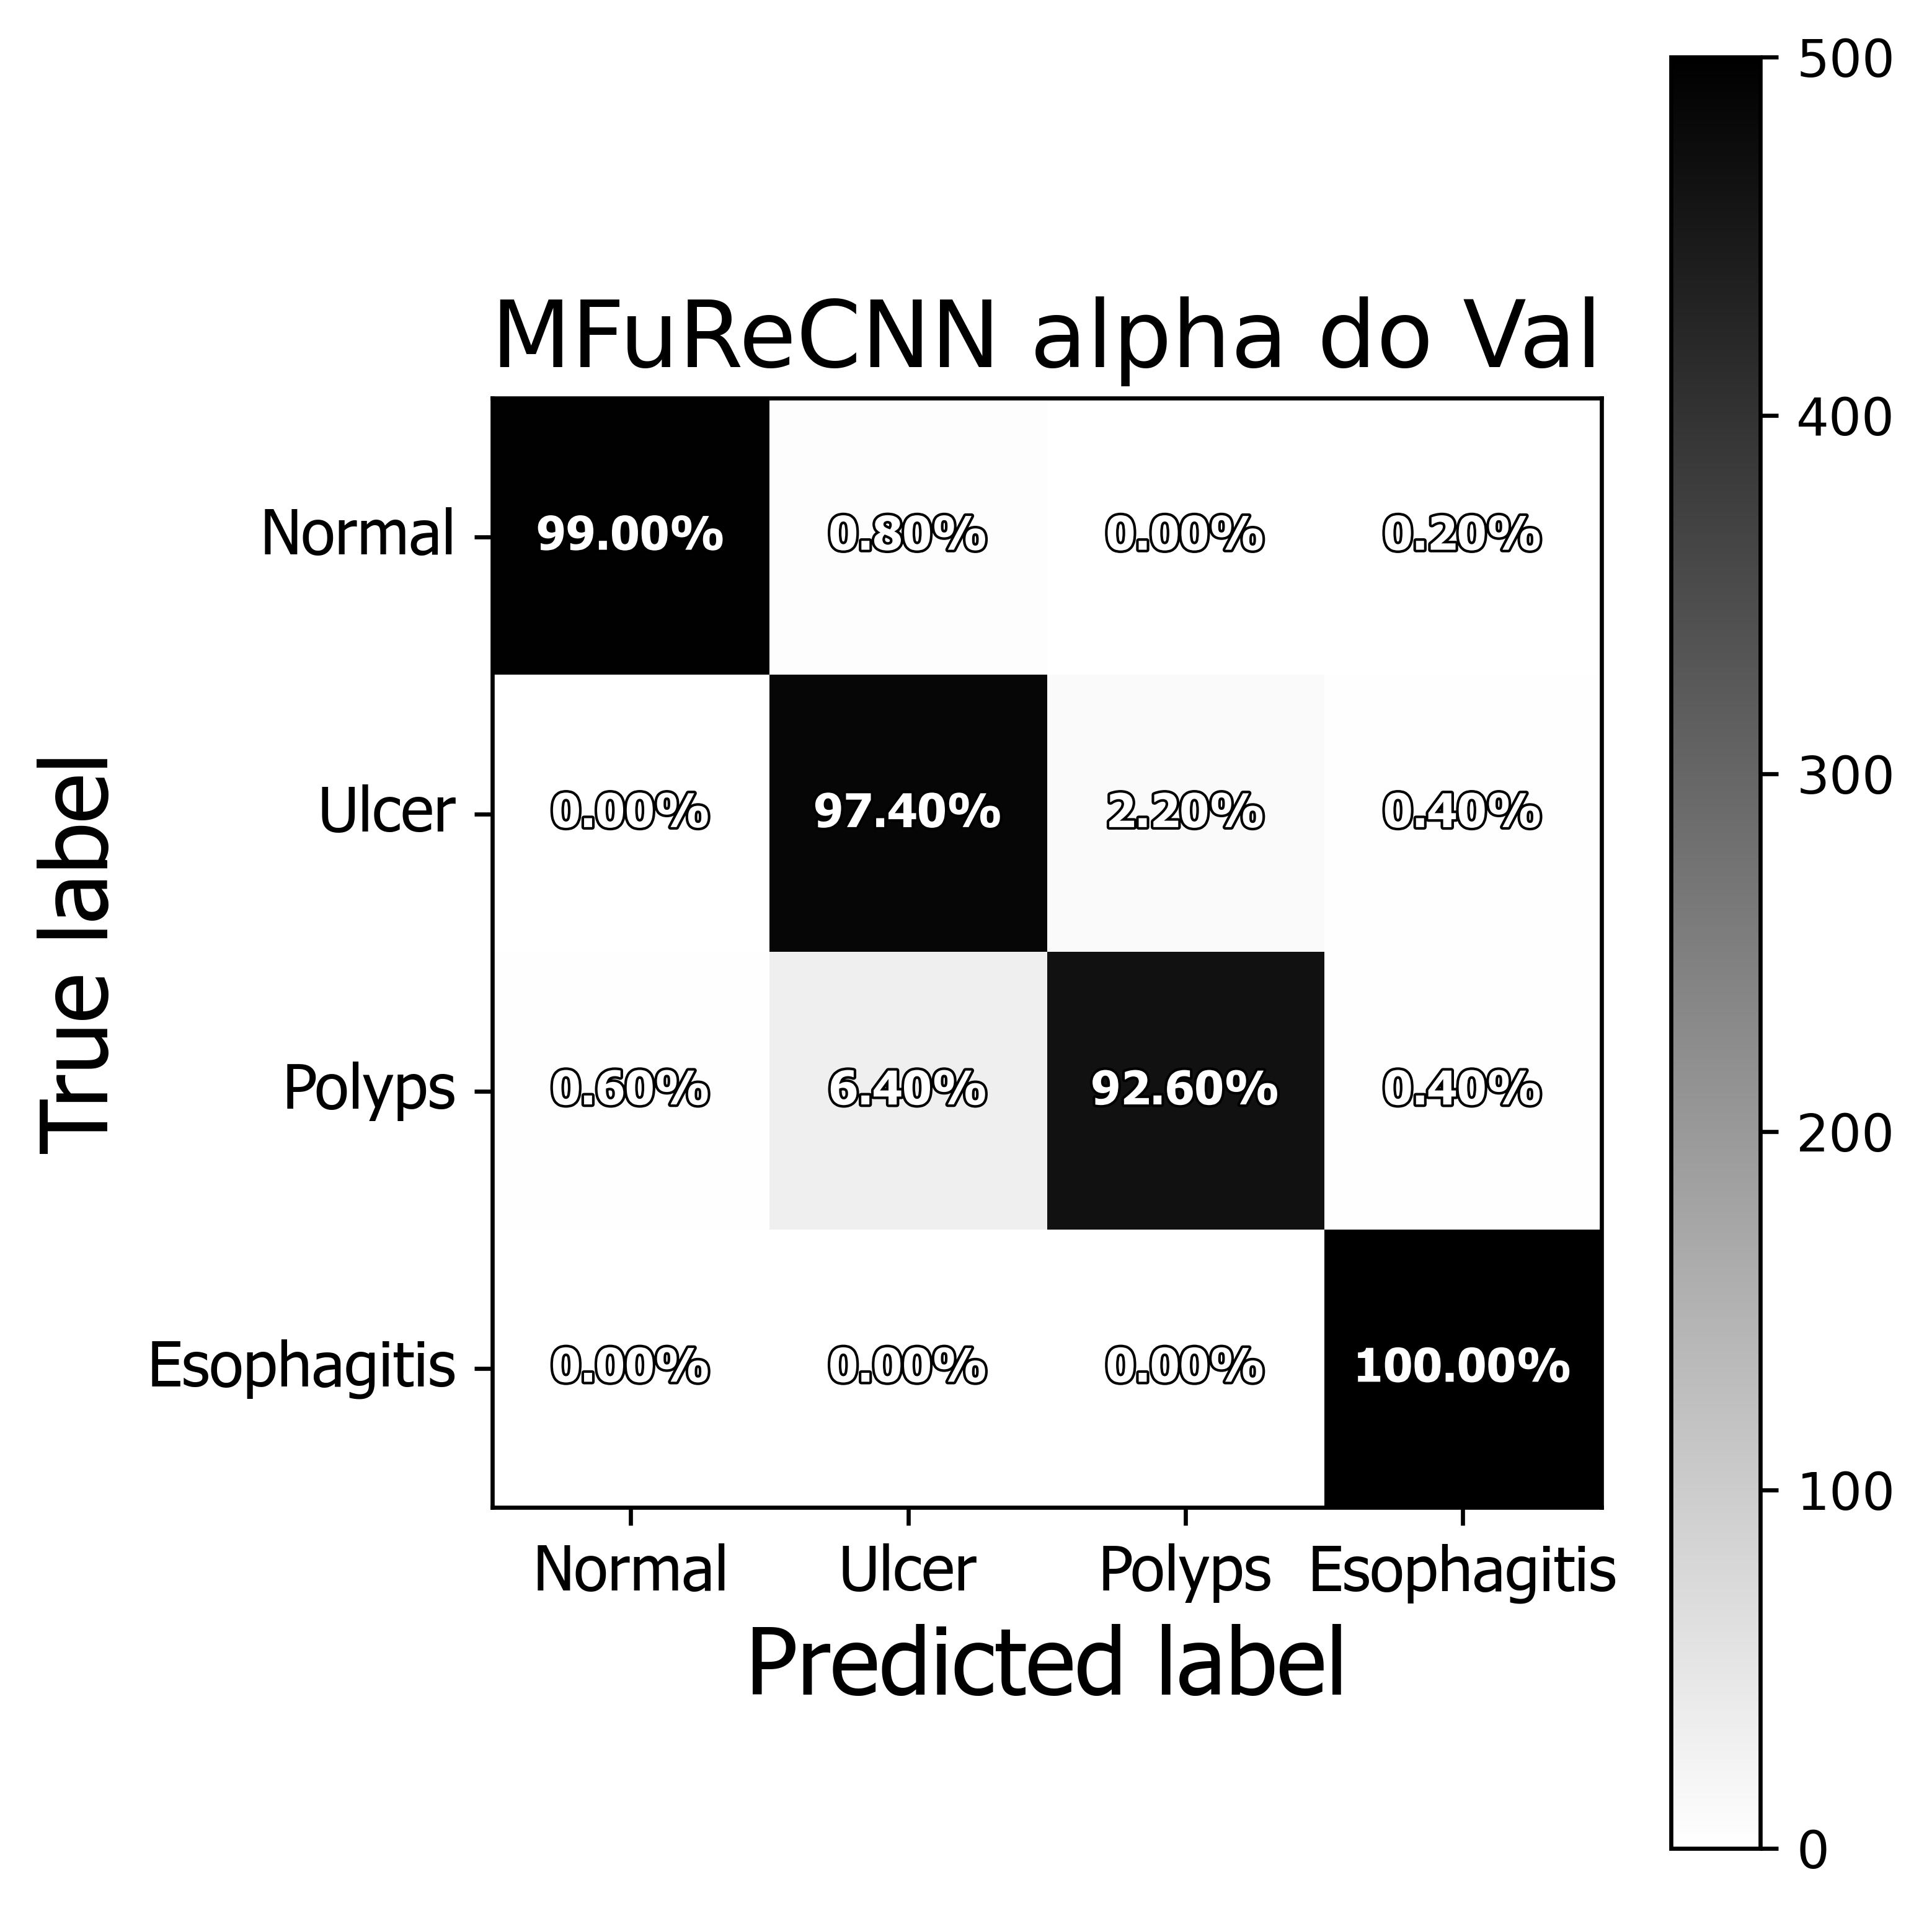

The history is loaded successfully.
Classification report saved to models/MFuRe_alpha__do_Learning_rate_0.01_Classification_report.txt


In [19]:
# Confusion Matrix (Normalized)

fontsize=12

def confusion_matrix_test(cm, classes,
                          normalize=True, #if true all values in confusion matrix is between 0 and 1
                          title=architecture + 'CNN ' + condition + ' ' + 'do' + ' Val',
                          cmap=plt.cm.binary):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=18)
    plt.colorbar(orientation='vertical')
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0, fontfamily = 'Tahoma', fontsize=fontsize, horizontalalignment="center")
    plt.yticks(tick_marks, classes, rotation=0, fontfamily = 'Tahoma', fontsize=fontsize, verticalalignment="center")

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        text = plt.text(j, i, '{:.2f}%'.format(cm[i, j]*100),
                 fontfamily = 'Tahoma', 
                 fontsize=9, weight='bold',
                 horizontalalignment="center", verticalalignment='center',
                 color="white" if cm[i, j] > thresh else "white")
        text.set_path_effects([path_effects.Stroke(linewidth=1, foreground='black'), 
        path_effects.Normal()]),

    
    plt.tight_layout()
    plt.ylabel('True label', fontfamily = 'Tahoma', fontsize=18, horizontalalignment="center")
    plt.xlabel('Predicted label', fontfamily = 'Tahoma', fontsize=18)

#print classification report and plot confusion matrix
plt.style.use("default")
target_names = ['Normal', 'Ulcer', 'Polyps', 'Esophagitis']
print(classification_report(Y_test,y_pred.argmax(axis=-1),
                            target_names=target_names, digits=4))

# Compute confusion matrix
cnf_matrix_test = confusion_matrix(Y_test,y_pred.argmax(axis=-1))
np.set_printoptions(precision=4)

# Plot non-normalized confusion matrix
plt.figure(figsize=(5.25, 5.25), dpi=600)
confusion_matrix_test(cnf_matrix_test, classes=target_names)
plt.tight_layout()

plt.savefig(val_cm_save, 
            bbox_inches='tight', 
            dpi=dpi)
plt.show()
#================================================================
model_save_dir = f"models/{architecture}"
# Load the model training history
history_filename = f'models/{architecture}CNN_{condition}_do_Learning_rate_0.01/MFuReCNN_alpha_do_Learning_rate_0.01_20240808-233637_history.pickle'
with open(history_filename, 'rb') as file:
    history = pickle.load(file)
    print("The history is loaded successfully.")

# Save classification report to file
report_filename = f"models/{architecture}_{condition}__do_Learning_rate_0.01_Classification_report.txt"
with open(report_filename, "w") as report_file:
    report = classification_report(Y_test, y_pred.argmax(axis=-1), target_names=target_names, digits=4)
    report_file.write(report)
    print(f"Classification report saved to {report_filename}")

#================================================================


              precision    recall  f1-score   support

      Normal     0.9940    0.9900    0.9920       500
       Ulcer     0.9312    0.9740    0.9521       500
      Polyps     0.9768    0.9260    0.9507       500
 Esophagitis     0.9901    1.0000    0.9950       500

    accuracy                         0.9725      2000
   macro avg     0.9730    0.9725    0.9725      2000
weighted avg     0.9730    0.9725    0.9725      2000

Confusion matrix, without normalization
[[495   4   0   1]
 [  0 487  11   2]
 [  3  32 463   2]
 [  0   0   0 500]]


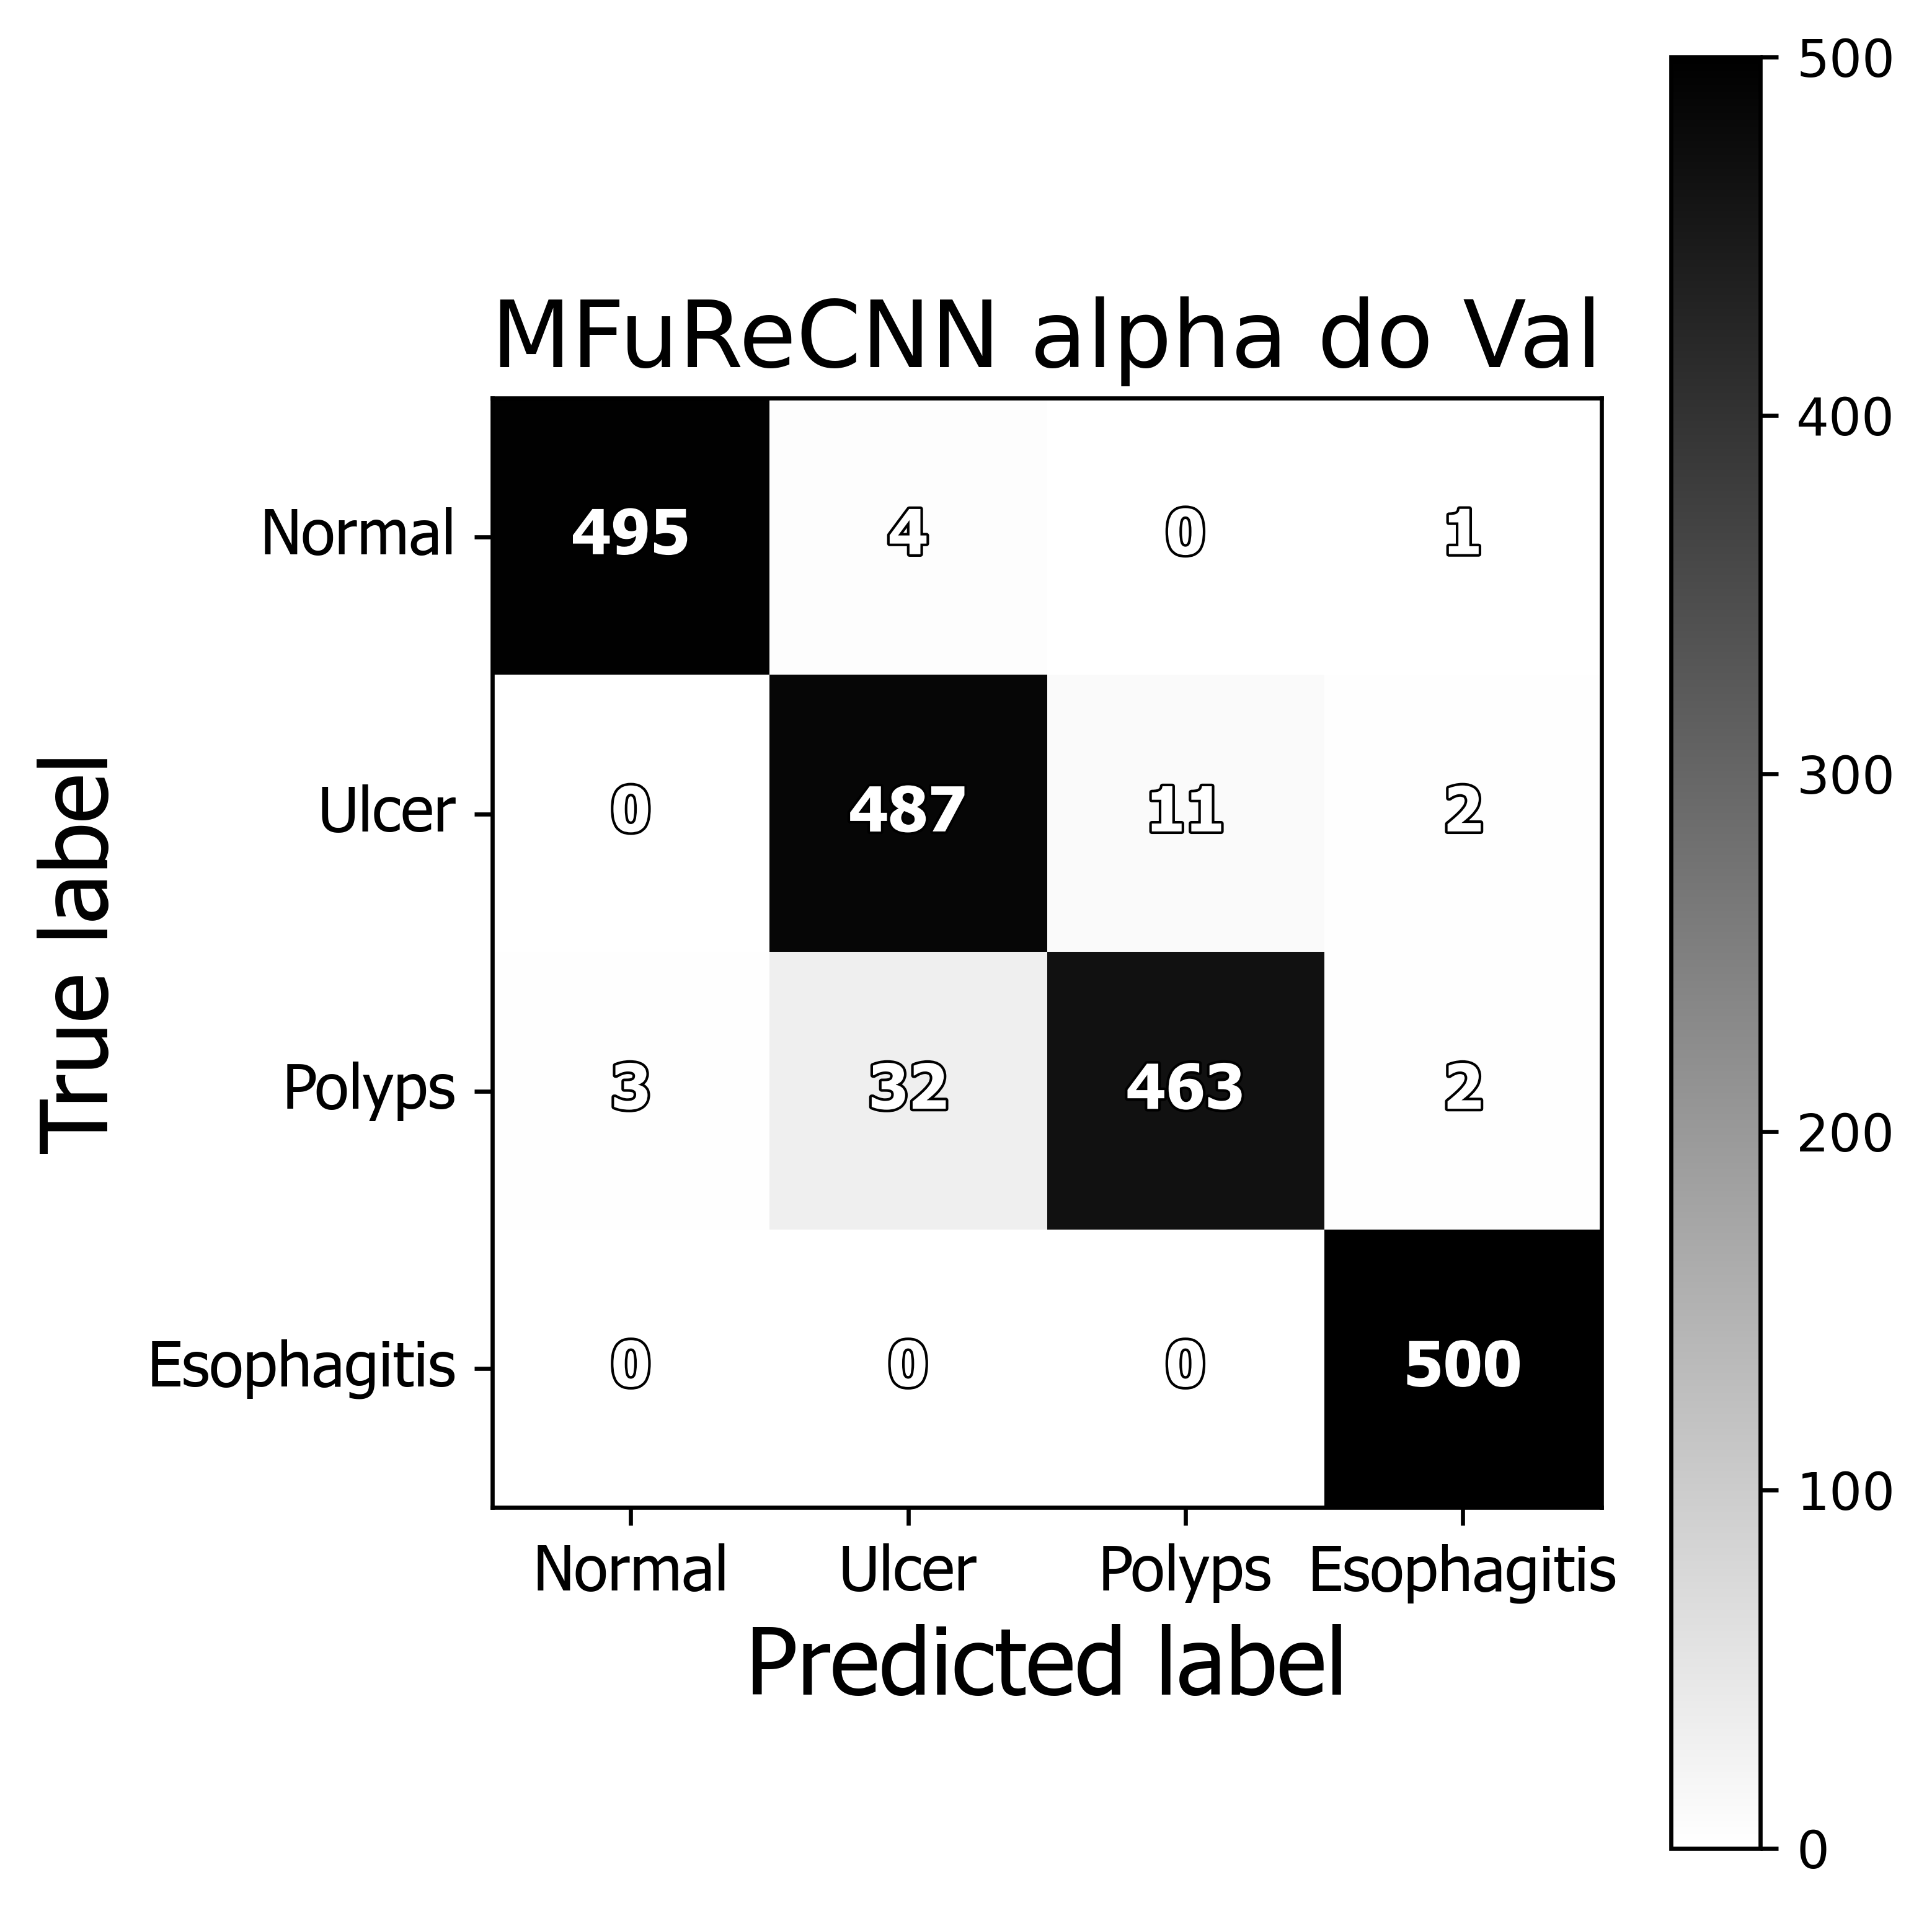

In [20]:
#Confusion Matrix

fontsize=12

def confusion_matrix_test(cm, classes,
                          normalize=False, #if true all values in confusion matrix is between 0 and 1
                          title=architecture + 'CNN ' + condition + ' ' + 'do' + ' Val',
                          cmap=plt.cm.binary):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=18)
    plt.colorbar(orientation='vertical')
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0, fontfamily = 'Tahoma', fontsize=fontsize, horizontalalignment="center")
    plt.yticks(tick_marks, classes, rotation=0, fontfamily = 'Tahoma', fontsize=fontsize, verticalalignment="center")

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        text = plt.text(j, i, cm[i, j],
                 fontfamily = 'Tahoma', 
                 fontsize=12, weight='bold',
                 horizontalalignment="center", verticalalignment='center',
                 color="white" if cm[i, j] > thresh else "white")
        text.set_path_effects([path_effects.Stroke(linewidth=1, foreground='black'), 
        path_effects.Normal()]),

    
    plt.tight_layout()
    plt.ylabel('True label', fontfamily = 'Tahoma', fontsize=18, horizontalalignment="center")
    plt.xlabel('Predicted label', fontfamily = 'Tahoma', fontsize=18)

#print classification report and plot confusion matrix
plt.style.use("default")
target_names = ['Normal', 'Ulcer', 'Polyps', 'Esophagitis']
print(classification_report(Y_test,y_pred.argmax(axis=-1),
                            target_names=target_names, digits=4))

# Compute confusion matrix
cnf_matrix_test = confusion_matrix(Y_test,y_pred.argmax(axis=-1))
np.set_printoptions(precision=4)

# Plot non-normalized confusion matrix
plt.figure(figsize=(5.25, 5.25), dpi=600)
confusion_matrix_test(cnf_matrix_test, classes=target_names)
plt.tight_layout()

plt.savefig(val_norm_cm_save, 
            bbox_inches='tight', 
            dpi=dpi)
plt.show()

In [21]:
#Re-updated plotting format for CURVES
plt.rcParams.update({'figure.figsize': [6,6]})
plt.rcParams.update({'figure.dpi': 300})
plt.rcParams.update({'font.size': 12})
plt.rcParams.update({'legend.borderpad': 0.2})
plt.rcParams.update({'legend.fontsize': 'xx-large'})
plt.rcParams.update({'legend.frameon': True})

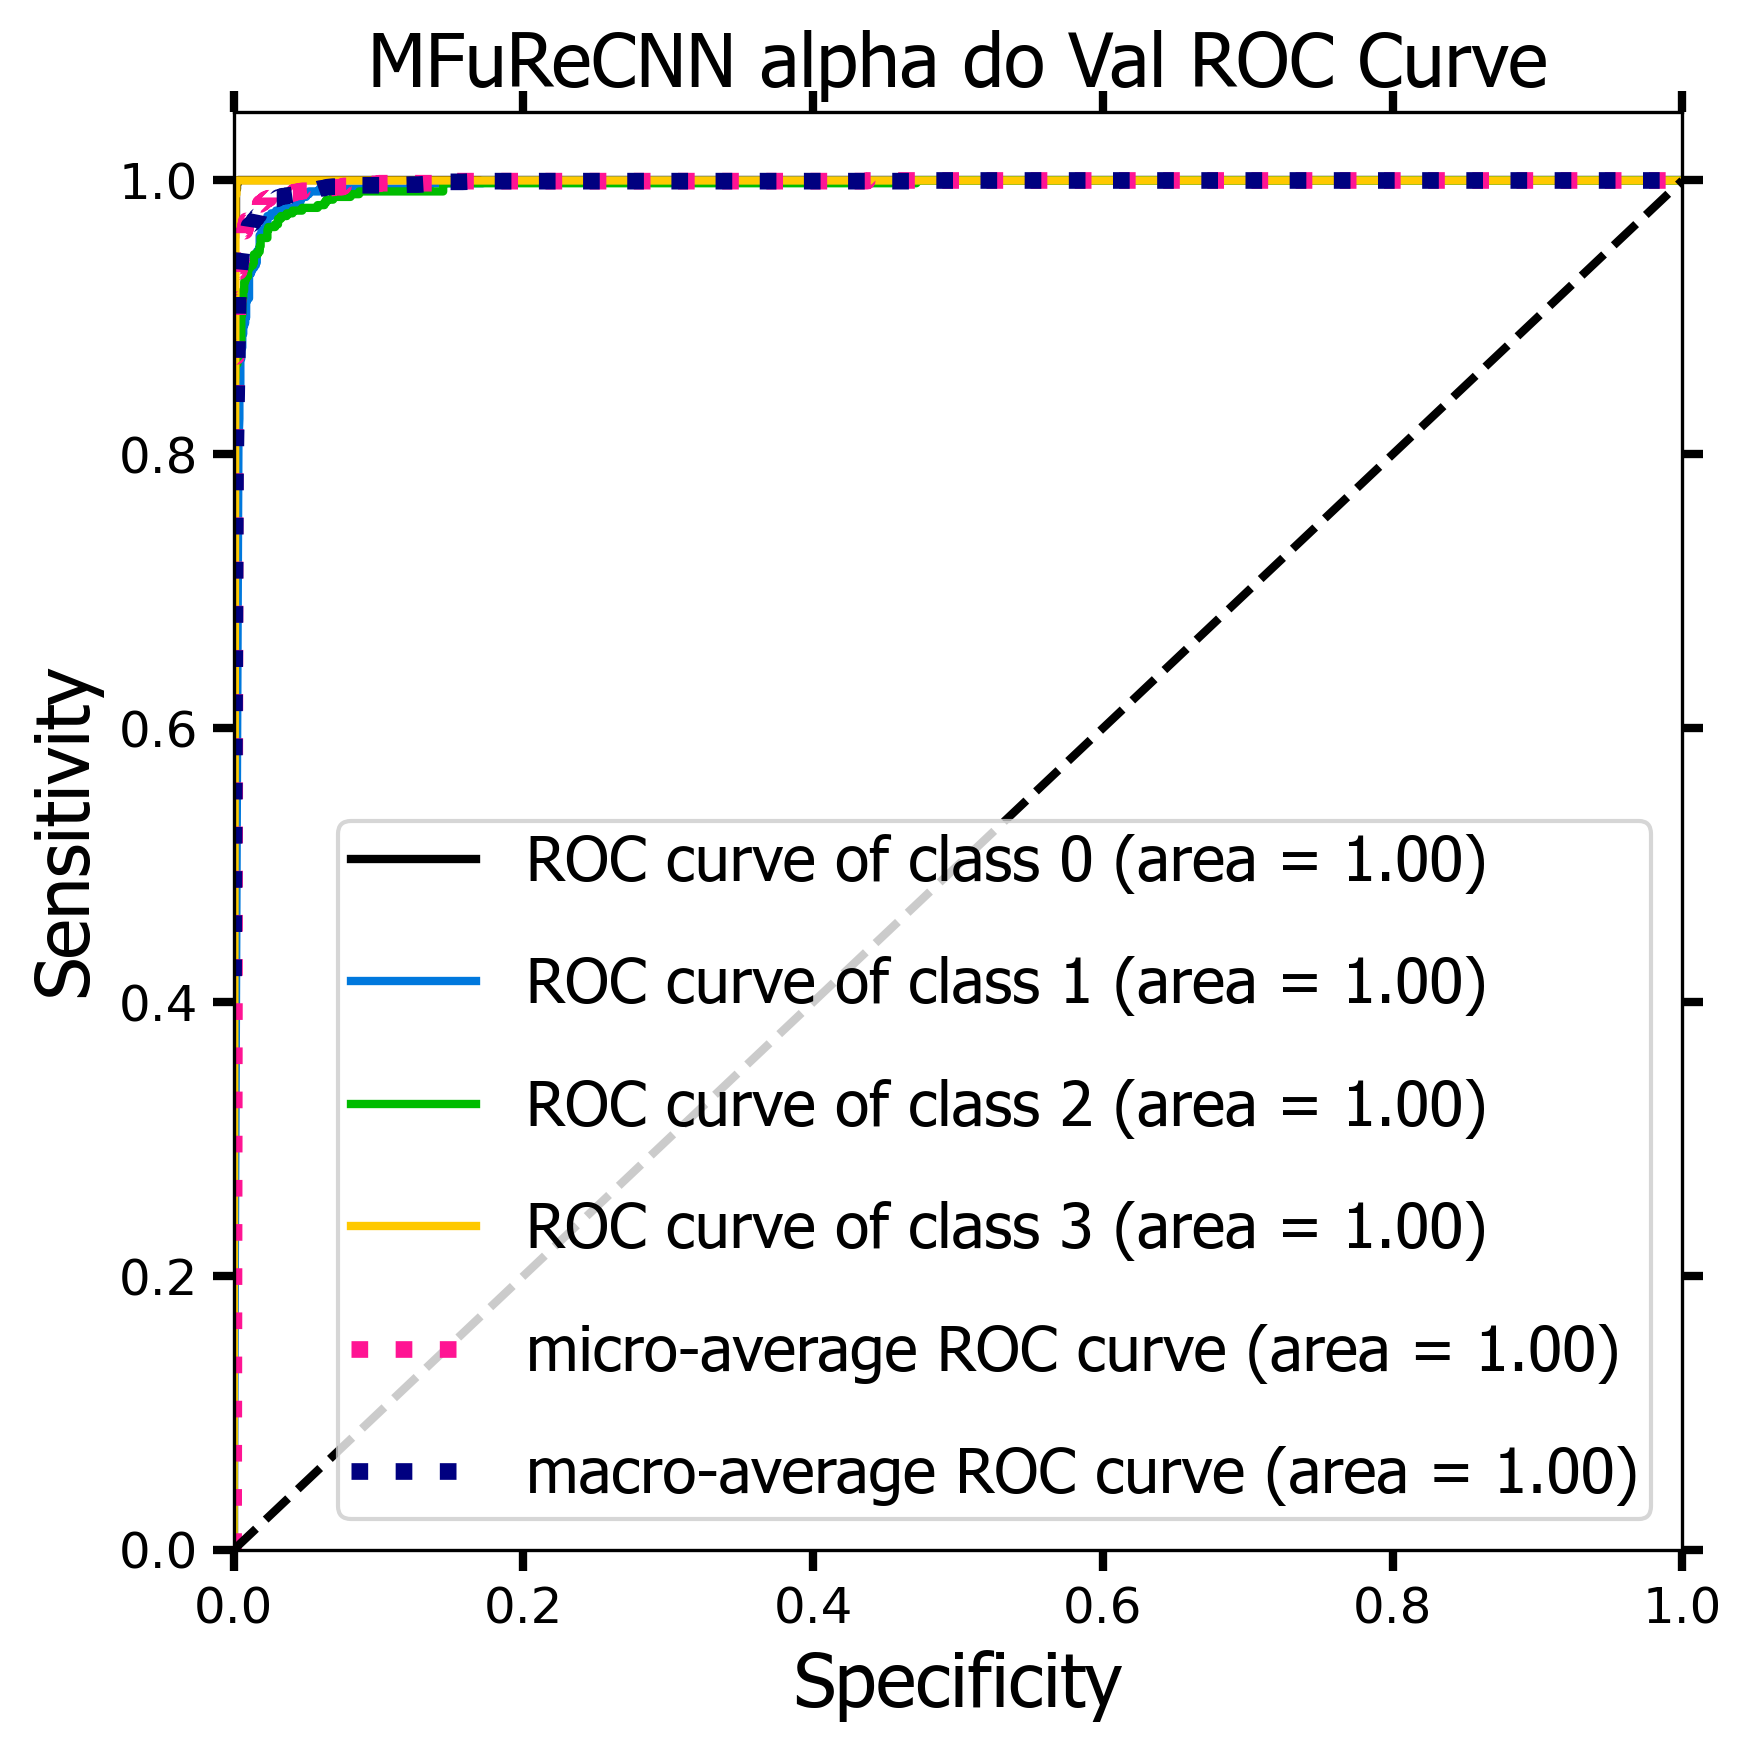

In [22]:
#ROC validation
scikitplot.metrics.plot_roc(Y_test, y_pred)
plt.title(architecture + 'CNN ' + condition + ' ' + 'do' + ' Val' + ' ROC Curve', fontsize=18, fontfamily='Tahoma')
plt.xlabel('Specificity', fontsize=18, fontfamily='Tahoma')
plt.ylabel('Sensitivity', fontsize=18, fontfamily='Tahoma')

plt.tick_params(length = 5, 
                width = 2, 
                right = True, 
                top = True, 
                labelsize = 12)

plt.rc('xtick', direction="in") 
plt.rc('ytick', direction="in") 
legend = plt.legend(loc="lower right", fontsize=15, labelspacing=1)
plt.setp(legend.texts, family = 'Tahoma')

plt.tight_layout()
plt.savefig(val_roc_save, 
            bbox_inches='tight', 
            dpi=dpi)
plt.show()

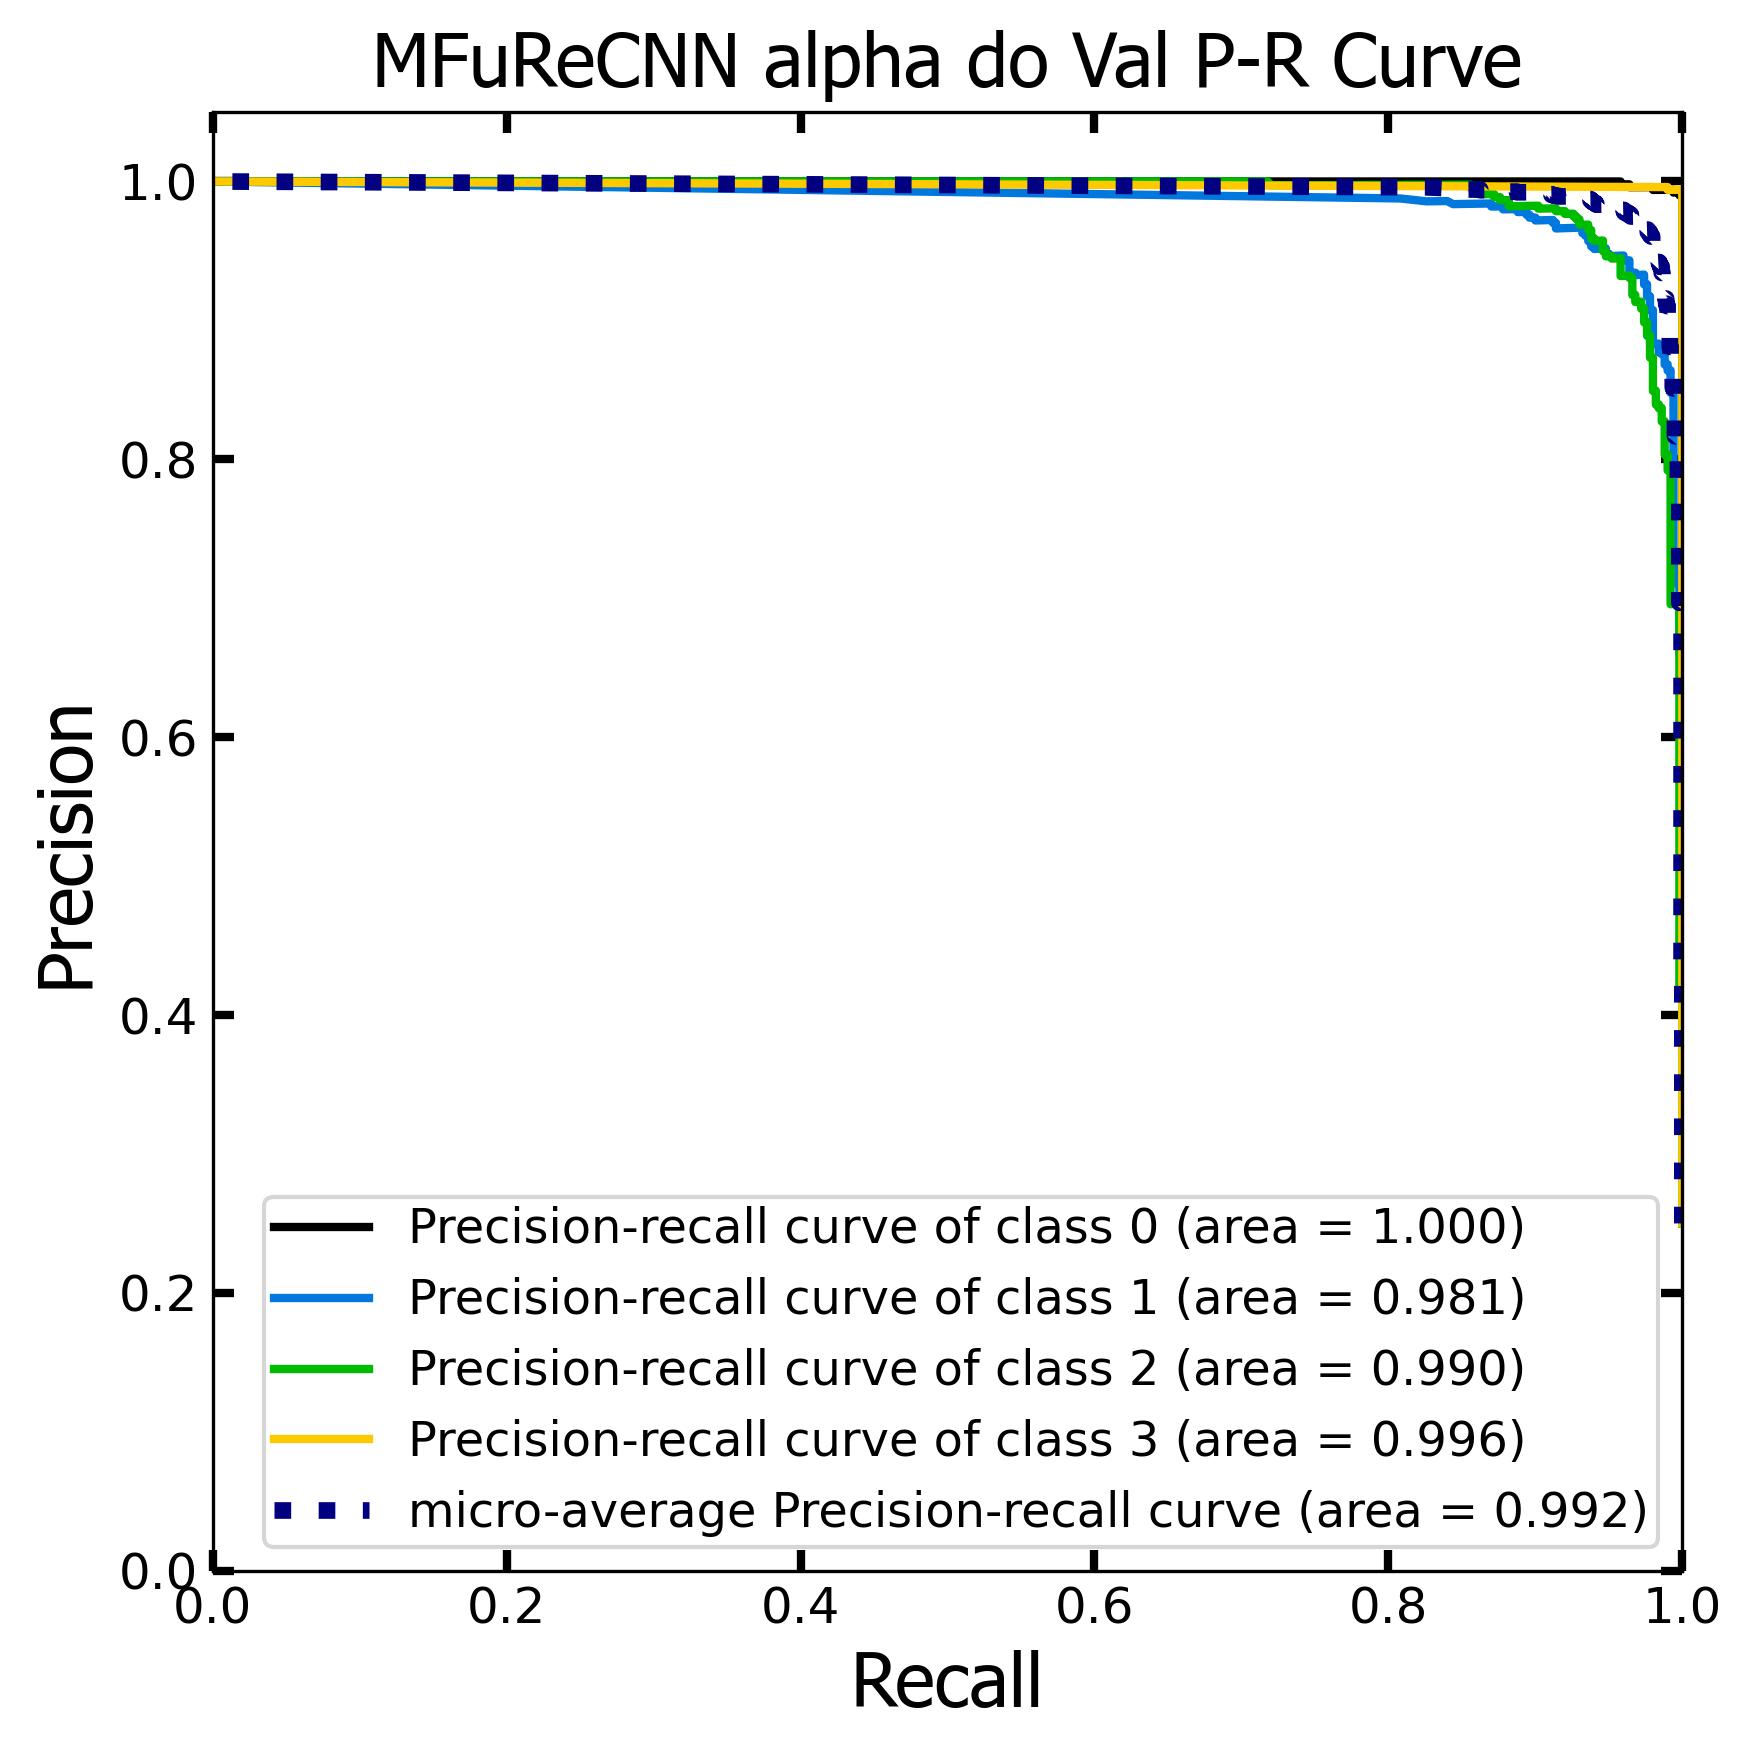

In [23]:
#P-R validation
scikitplot.metrics.plot_precision_recall(Y_test, y_pred)
plt.title(architecture + 'CNN ' + condition + ' ' + 'do' + ' Val' + ' P-R Curve', fontsize=18, fontfamily='Tahoma')
plt.xlabel('Recall', fontsize=18, fontfamily='Tahoma')
plt.ylabel('Precision', fontsize=18, fontfamily='Tahoma')

plt.tick_params(length = 5, 
                width = 2, 
                right = True, 
                top = True, 
                labelsize = 12)

plt.rc('xtick', direction="in") 
plt.rc('ytick', direction="in") 
plt.legend(loc="lower right", fontsize=11.5, labelspacing=0.5)
plt.setp(legend.texts, family = 'Tahoma')

plt.tight_layout()
plt.savefig(val_pr_save, 
            bbox_inches='tight', 
            dpi=dpi)
plt.show()

              precision    recall  f1-score   support

      Normal     0.9900    0.9950    0.9925       200
       Ulcer     0.9252    0.9900    0.9565       200
      Polyps     0.9892    0.9150    0.9506       200
 Esophagitis     0.9950    0.9950    0.9950       200

    accuracy                         0.9738       800
   macro avg     0.9749    0.9738    0.9737       800
weighted avg     0.9749    0.9738    0.9737       800

Normalized confusion matrix
[[0.995 0.005 0.    0.   ]
 [0.    0.99  0.005 0.005]
 [0.01  0.075 0.915 0.   ]
 [0.    0.    0.005 0.995]]


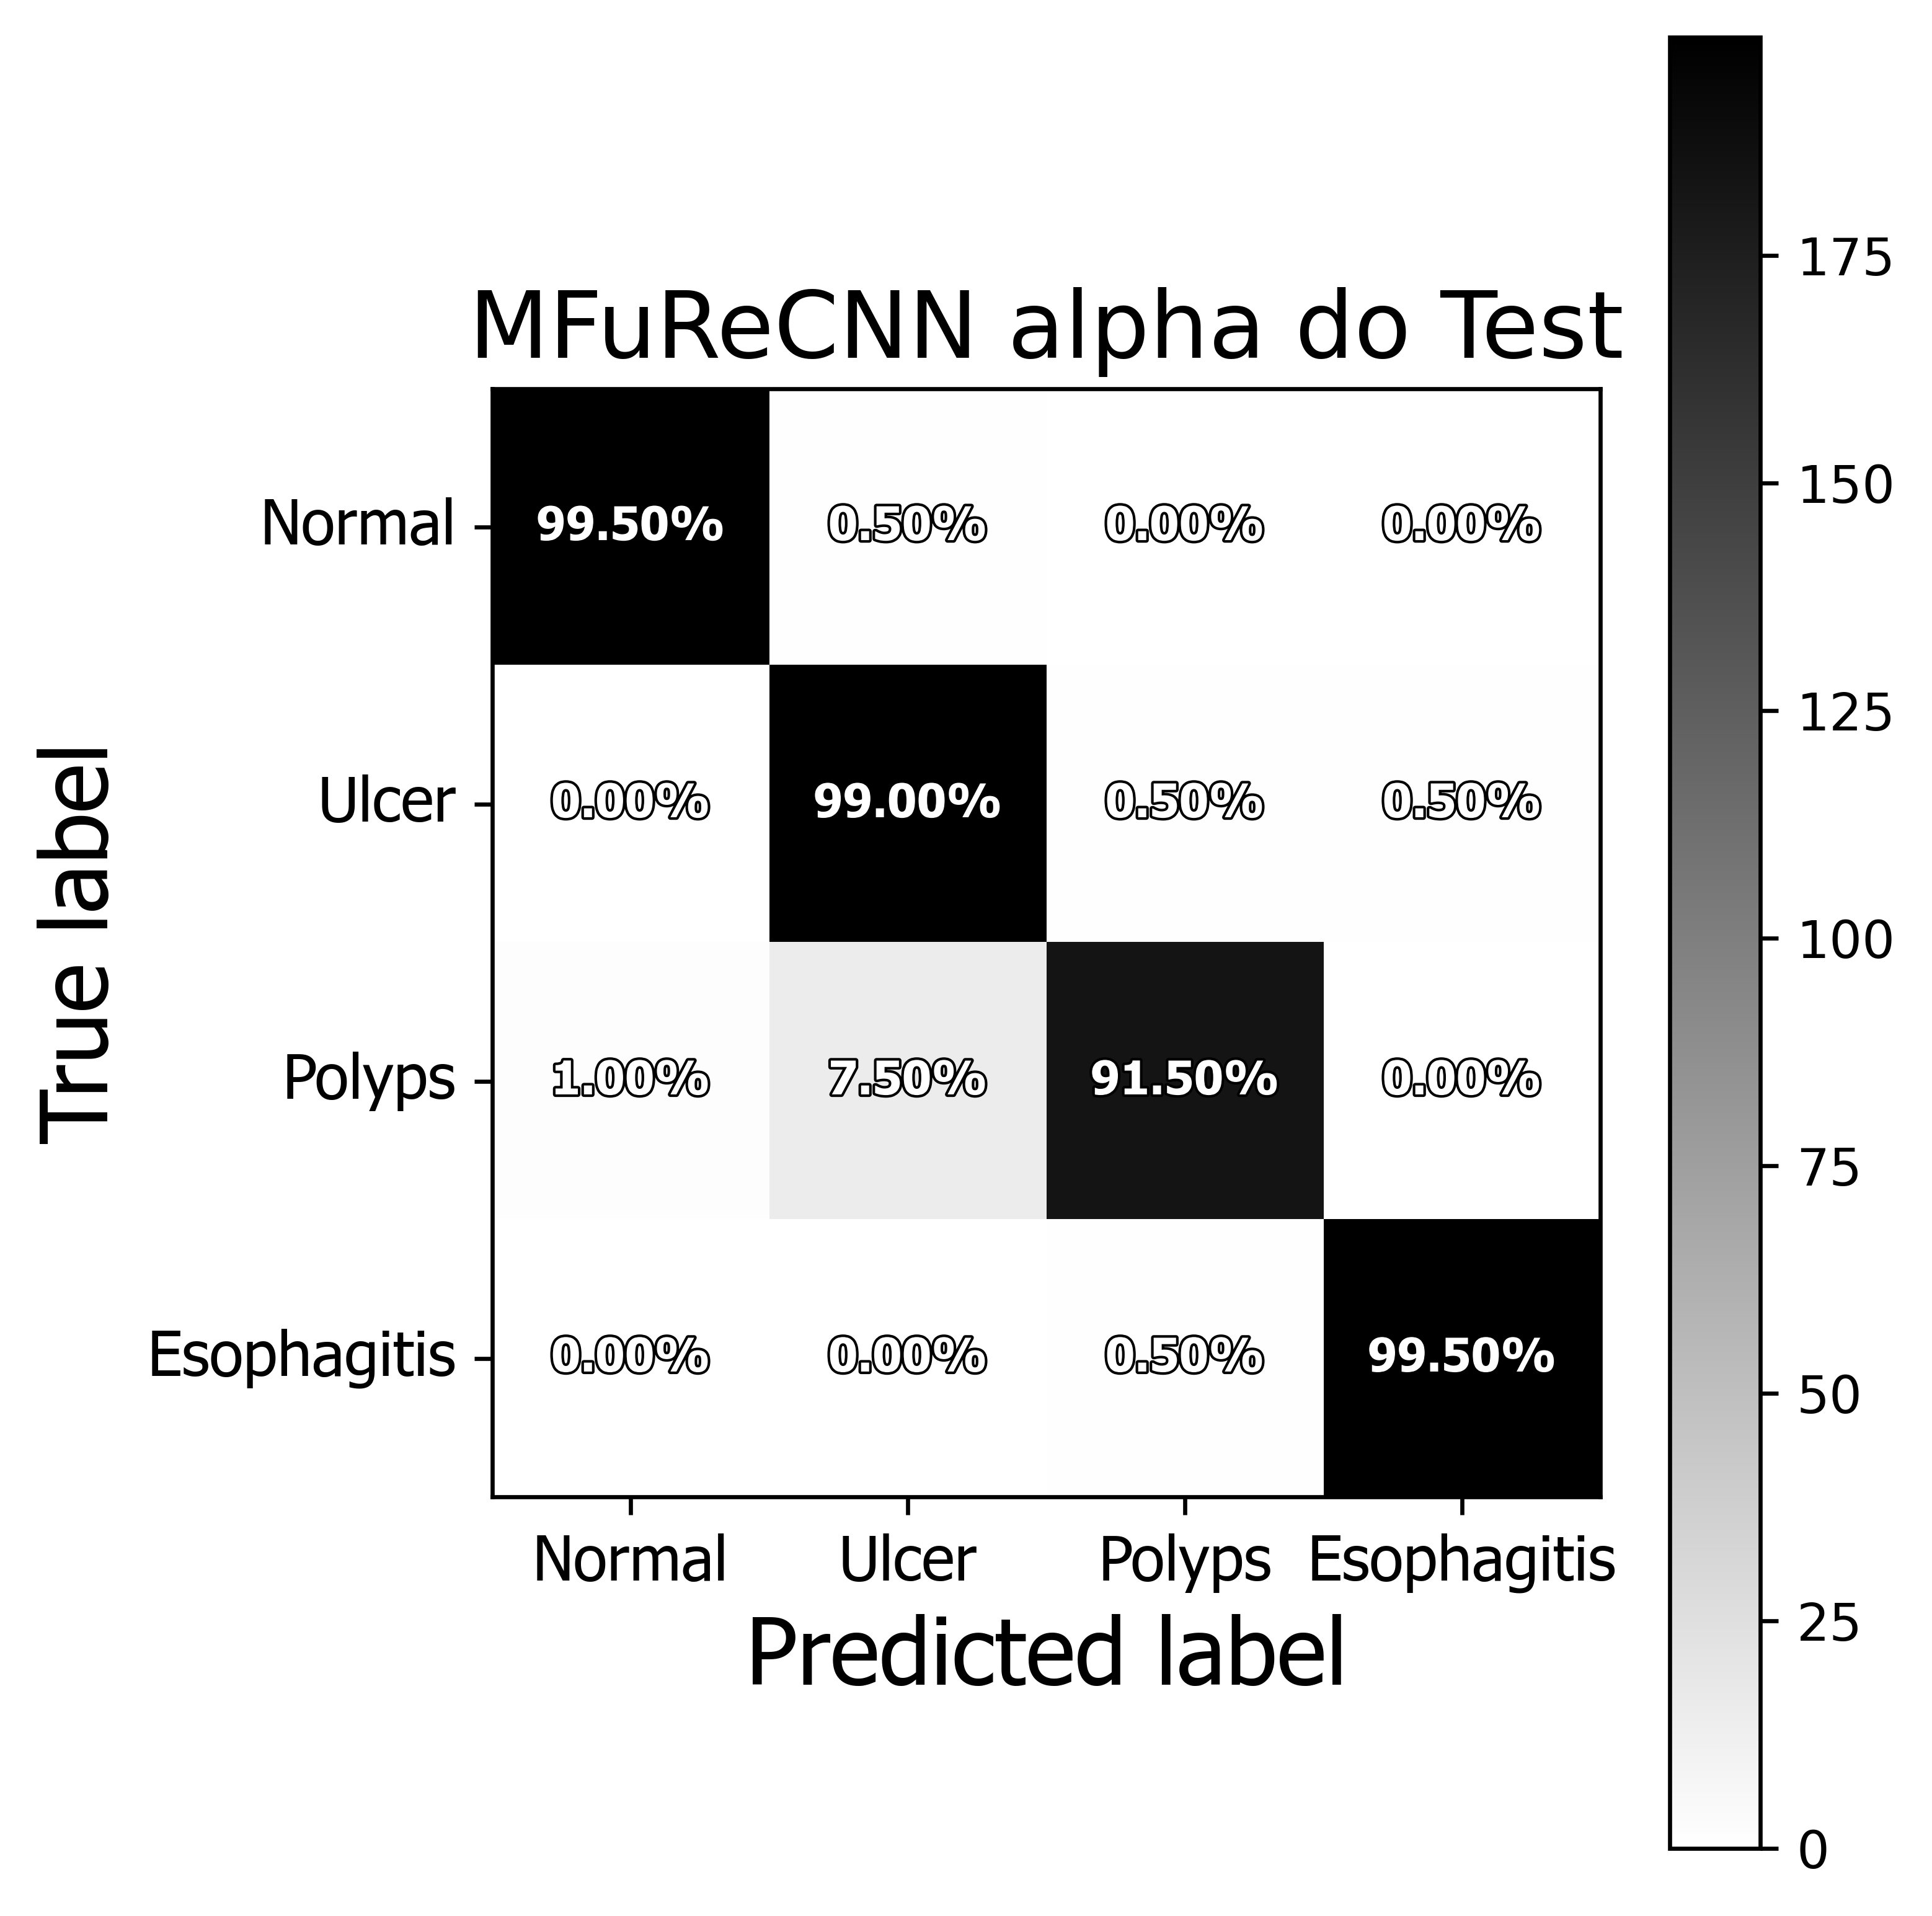

Classification report saved to models/MFuRe_alpha_do_Learning_rate_0.01_Test_classification_report.txt


In [24]:
# Confusion Matrix (Normalized)

fontsize=12

def confusion_matrix_test(cm, classes,
                          normalize=True, #if true all values in confusion matrix is between 0 and 1
                          title=architecture + 'CNN ' + condition + ' ' + 'do' + ' Test',
                          cmap=plt.cm.binary):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=18)
    plt.colorbar(orientation='vertical')
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0, fontfamily = 'Tahoma', fontsize=fontsize, horizontalalignment="center")
    plt.yticks(tick_marks, classes, rotation=0, fontfamily = 'Tahoma', fontsize=fontsize, verticalalignment="center")

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        text = plt.text(j, i, '{:.2f}%'.format(cm[i, j]*100),
                 fontfamily = 'Tahoma', 
                 fontsize=9, weight='bold',
                 horizontalalignment="center", verticalalignment='center',
                 color="white" if cm[i, j] > thresh else "white")
        text.set_path_effects([path_effects.Stroke(linewidth=1, foreground='black'), 
        path_effects.Normal()]),

    
    plt.tight_layout()
    plt.ylabel('True label', fontfamily = 'Tahoma', fontsize=18, horizontalalignment="center")
    plt.xlabel('Predicted label', fontfamily = 'Tahoma', fontsize=18)

#print classification report and plot confusion matrix
plt.style.use("default")
target_names = ['Normal', 'Ulcer', 'Polyps', 'Esophagitis']
print(classification_report(test_labels,test_pred.argmax(axis=-1),
                            target_names=target_names, digits=4))

# Compute confusion matrix
cnf_matrix_test = confusion_matrix(test_labels,test_pred.argmax(axis=-1))
np.set_printoptions(precision=4)

# Plot non-normalized confusion matrix
plt.figure(figsize=(5.25, 5.25), dpi=600)
confusion_matrix_test(cnf_matrix_test, classes=target_names)
plt.tight_layout()

plt.savefig(test_cm_save, 
            bbox_inches='tight', 
            dpi=dpi)
plt.show()

#================================================================
# Save classification report to file for Test Set
report_filename = f"models/{architecture}_{condition}_do_Learning_rate_0.01_Test_classification_report.txt"
with open(report_filename, "w") as report_file:
    report = classification_report(test_labels, test_pred.argmax(axis=-1), target_names=target_names, digits=4)
    report_file.write(report)
    print(f"Classification report saved to {report_filename}")

#================================================================


              precision    recall  f1-score   support

      Normal     0.9900    0.9950    0.9925       200
       Ulcer     0.9252    0.9900    0.9565       200
      Polyps     0.9892    0.9150    0.9506       200
 Esophagitis     0.9950    0.9950    0.9950       200

    accuracy                         0.9738       800
   macro avg     0.9749    0.9738    0.9737       800
weighted avg     0.9749    0.9738    0.9737       800

Confusion matrix, without normalization
[[199   1   0   0]
 [  0 198   1   1]
 [  2  15 183   0]
 [  0   0   1 199]]


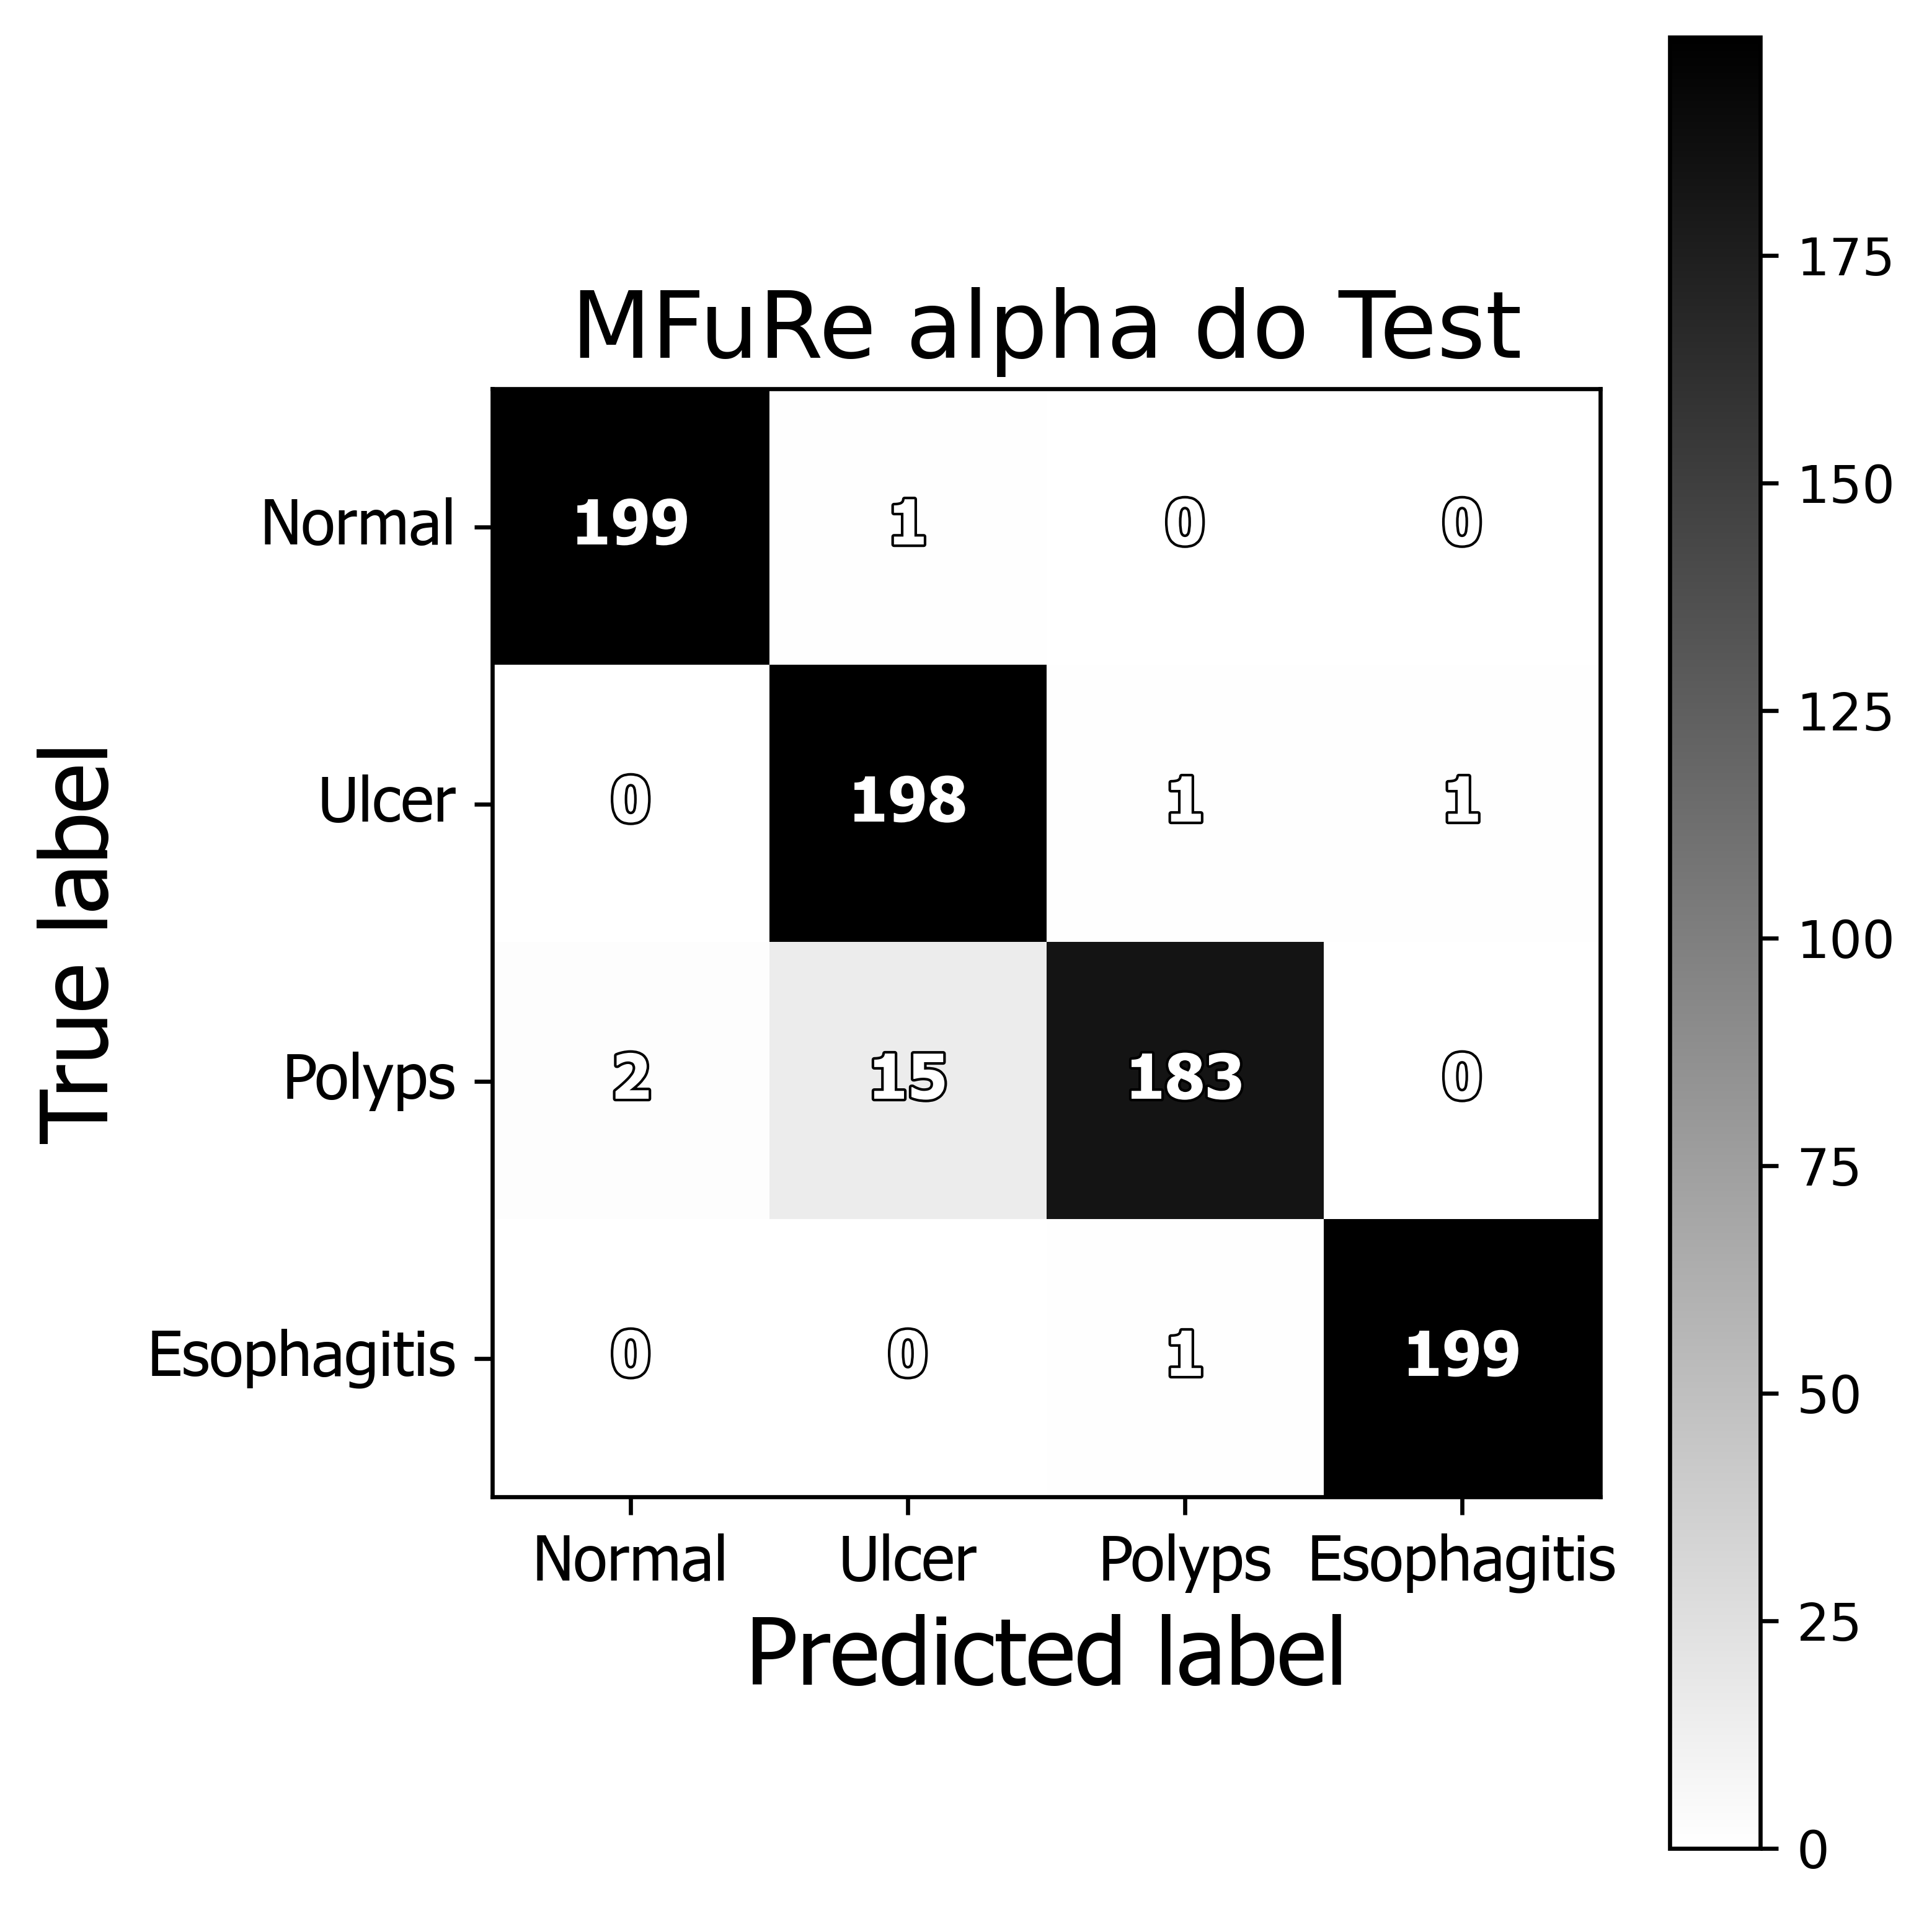

In [25]:
#Confusion Matrix

fontsize=12

def confusion_matrix_test(cm, classes,
                          normalize=False, #if true all values in confusion matrix is between 0 and 1
                          title=architecture + ' ' + condition + ' ' + 'do' + ' Test',
                          cmap=plt.cm.binary):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=18)
    plt.colorbar(orientation='vertical')
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0, fontfamily = 'Tahoma', fontsize=fontsize, horizontalalignment="center")
    plt.yticks(tick_marks, classes, rotation=0, fontfamily = 'Tahoma', fontsize=fontsize, verticalalignment="center")

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        text = plt.text(j, i, cm[i, j],
                 fontfamily = 'Tahoma', 
                 fontsize=12, weight='bold',
                 horizontalalignment="center", verticalalignment='center',
                 color="white" if cm[i, j] > thresh else "white")
        text.set_path_effects([path_effects.Stroke(linewidth=1, foreground='black'), 
        path_effects.Normal()]),

    
    plt.tight_layout()
    plt.ylabel('True label', fontfamily = 'Tahoma', fontsize=18, horizontalalignment="center")
    plt.xlabel('Predicted label', fontfamily = 'Tahoma', fontsize=18)

#print classification report and plot confusion matrix
plt.style.use("default")
target_names = ['Normal', 'Ulcer', 'Polyps', 'Esophagitis']
print(classification_report(test_labels, test_pred.argmax(axis=-1),
                            target_names=target_names, digits=4))

# Compute confusion matrix
cnf_matrix_test = confusion_matrix(test_labels, test_pred.argmax(axis=-1))
np.set_printoptions(precision=4)

# Plot non-normalized confusion matrix
plt.figure(figsize=(5.25, 5.25), dpi=600)
confusion_matrix_test(cnf_matrix_test, classes=target_names)
plt.tight_layout()

plt.savefig(test_norm_cm_save, 
            bbox_inches='tight', 
            dpi=dpi)
plt.show()

In [26]:
#re-update plot for CURVES
plt.rcParams.update({'figure.figsize': [6,6]})
plt.rcParams.update({'figure.dpi': 300})
plt.rcParams.update({'font.size': 12})
plt.rcParams.update({'legend.borderpad': 0.2})
plt.rcParams.update({'legend.fontsize': 'xx-large'})
plt.rcParams.update({'legend.frameon': True})

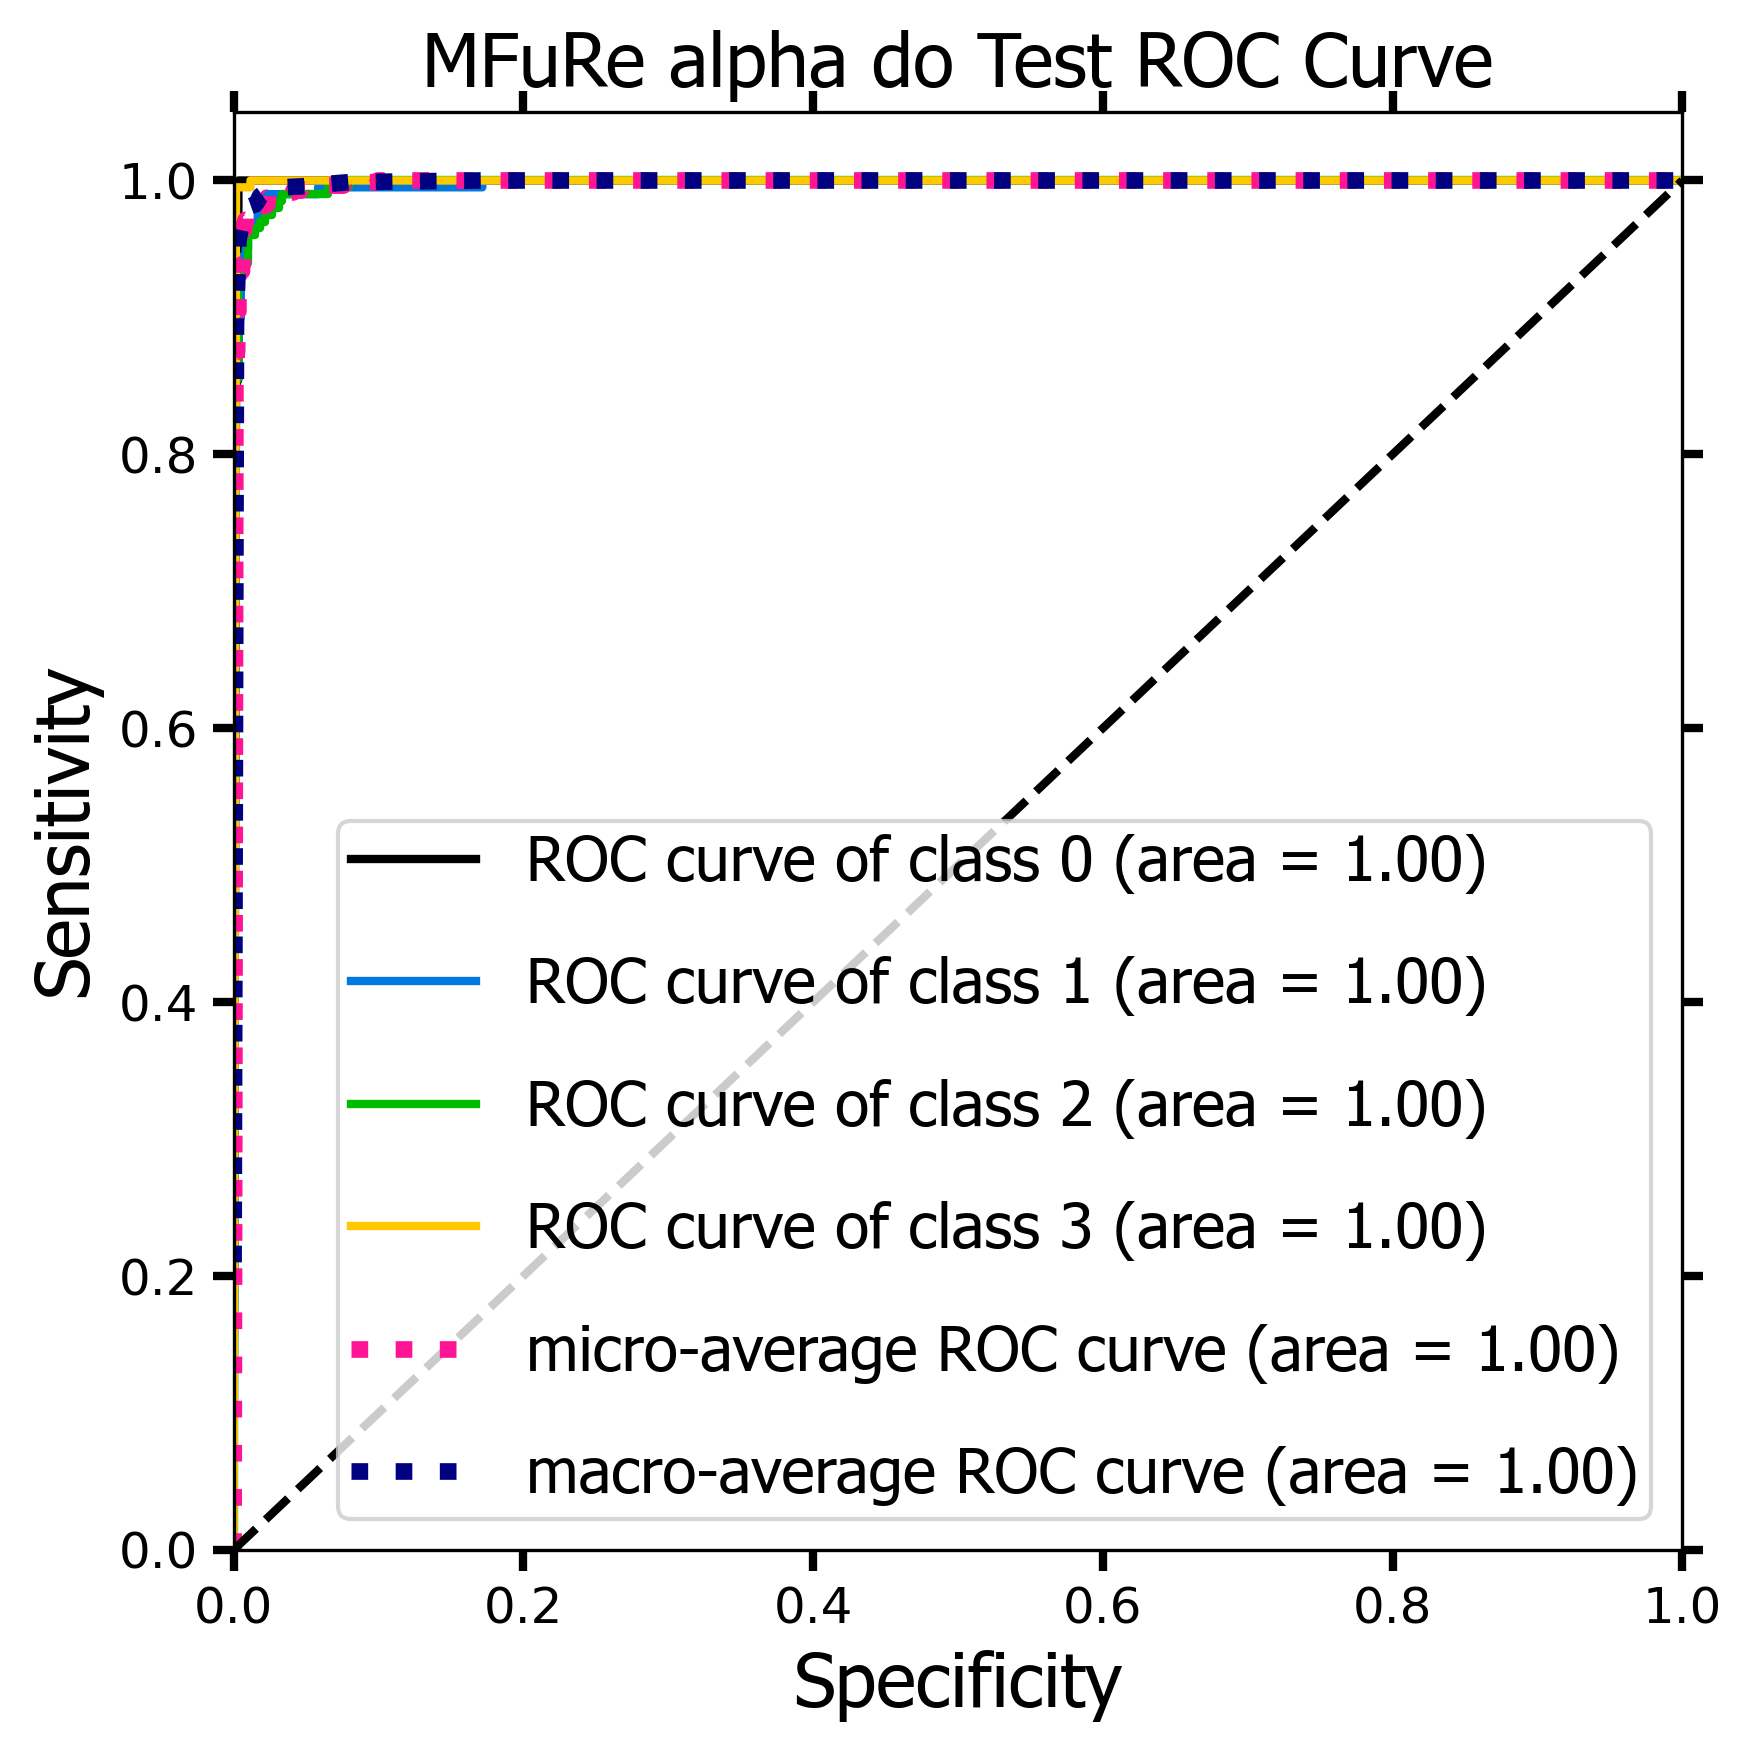

In [27]:
#ROC test
scikitplot.metrics.plot_roc(test_labels, test_pred)
plt.title(architecture + ' ' + condition + ' ' + 'do' + ' Test' + ' ROC Curve', fontsize=18, fontfamily='Tahoma')
plt.xlabel('Specificity', fontsize=18, fontfamily='Tahoma')
plt.ylabel('Sensitivity', fontsize=18, fontfamily='Tahoma')

plt.tick_params(length = 5, 
                width = 2, 
                right = True, 
                top = True, 
                labelsize = 12)

plt.rc('xtick', direction="in") 
plt.rc('ytick', direction="in") 
legend = plt.legend(loc="lower right", fontsize=15, labelspacing=1)
plt.setp(legend.texts, family = 'Tahoma')

plt.tight_layout()
plt.savefig(test_roc_save, 
            bbox_inches='tight', 
            dpi=dpi)
plt.show()

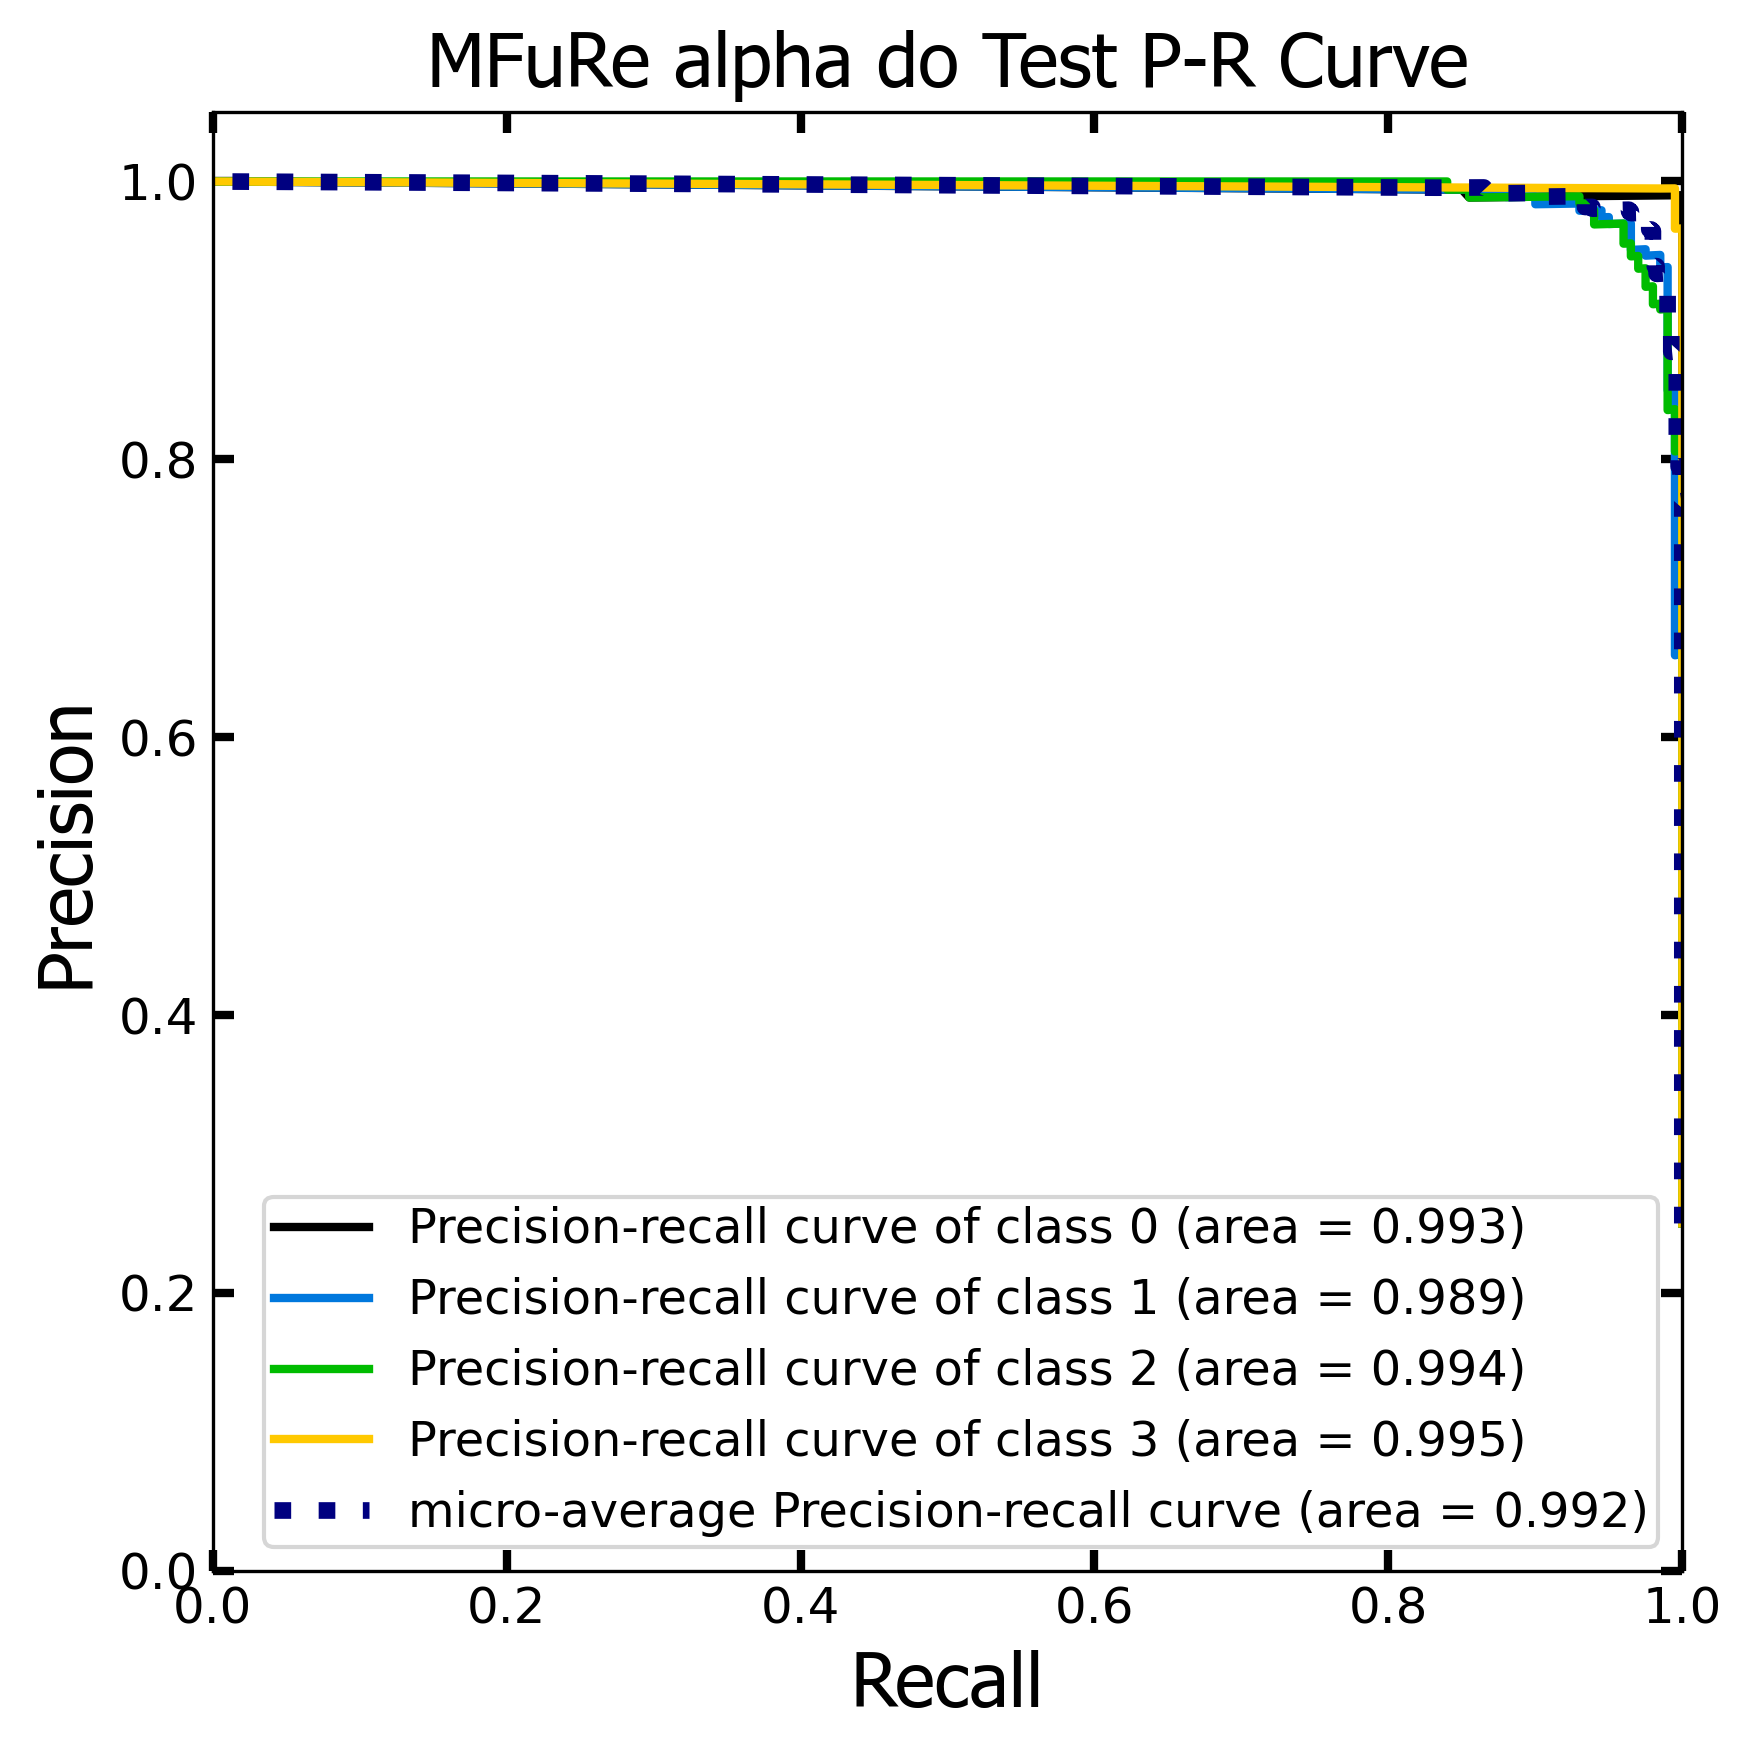

In [28]:
#P-R test
scikitplot.metrics.plot_precision_recall(test_labels, test_pred)
plt.title(architecture + ' ' + condition + ' ' + 'do' + ' Test' + ' P-R Curve', fontsize=18, fontfamily='Tahoma')
plt.xlabel('Recall', fontsize=18, fontfamily='Tahoma')
plt.ylabel('Precision', fontsize=18, fontfamily='Tahoma')

plt.tick_params(length = 5, 
                width = 2, 
                right = True, 
                top = True, 
                labelsize = 12)

plt.rc('xtick', direction="in") 
plt.rc('ytick', direction="in") 
plt.legend(loc="lower right", fontsize=11.5, labelspacing=0.5)
plt.setp(legend.texts, family = 'Tahoma')

plt.tight_layout()
plt.savefig(test_pr_save, 
            bbox_inches='tight', 
            dpi=dpi)
plt.show()

<h2>Computational cost</h2>